In [1]:
# Load required libraries and results from economic analysis functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

In [2]:
from modules.modelling_assumptions import field_10m_assum
from modules.modelling_assumptions import field_50m_assum
from modules.modelling_assumptions import field_100m_assum
from modules.modelling_assumptions import market_assumptions
from modules.modelling_assumptions import tax_assumptions
from modules.modelling_assumptions import tax_assumptions_autumn_epl
from modules.modelling_assumptions import tax_assumptions_delayed_autumn_epl
from modules.modelling_assumptions import tax_assumptions_delayed_summer_epl
from modules.modelling_assumptions import tax_assumptions_labour_epl_a
from modules.modelling_assumptions import tax_assumptions_labour_epl_b
from modules.modelling_assumptions import tax_assumptions_delayed_labour_epl_a
from modules.modelling_assumptions import tax_assumptions_delayed_labour_epl_b

from economic_analysis_class import calculate_economic_results
from economic_analysis_class import calculate_cashflow_results

In [3]:
# Add every font at the specified location
font_dir = ["/Users/arturo/Library/CloudStorage/OneDrive-UniversityofAberdeen/Arturo/Projects\ -\ Conferences\ -\ Presentations/Consulting/EPL_Analysis/Lato"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

font_dir = ["/Users/arturo/Library/CloudStorage/OneDrive-UniversityofAberdeen/Arturo/Projects\ -\ Conferences\ -\ Presentations/Consulting/EPL_Analysis/Roboto"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

In [4]:
# Plot parameters
mpl.rcParams['axes.titlesize'] = 14

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['xtick.labelcolor'] = 'grey'
mpl.rcParams['xtick.color'] = 'grey'

mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['ytick.labelcolor'] = 'grey'
mpl.rcParams['ytick.color'] = 'grey'

mpl.rcParams['axes.labelcolor'] = 'grey'
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['axes.edgecolor'] = 'grey'

mpl.rcParams['legend.fontsize'] = 8

# mpl.rcParams['font.family'] = 'Lato'

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [5]:
color_base_line = '#003f5c'
color_highlight_red = '#bc5090'
color_highlight_purple = '#58508d'
color_highlight_orangered = '#ff6361'

In [6]:
# %% Get results for analysis and plotting

# Important assumptions that need to be set out in the paper.
# The original EPL began May 2022 and was to finish Dec 2025, the new EPL extends until March 2028
# For simplicty and because the model runs in years I assum orginal EPL lasts 4 years (2022-2025) assuming it
# includes all of 2022.
# For the new EPL it is 6 years, only two are added (2022-2027) this is to avid adjustments to first quarters of 2022
# and 2028; the net impact will not be meaningful as we are assume 5 more months in 2022 and 3 less of 2028.
# See EPL factsheet for more details
# https://www.gov.uk/government/publications/changes-to-the-energy-oil-and-gas-profits-levy/energy-oil-and-gas-profits-levy

field_assumptions = field_10m_assum
results_small_field = calculate_economic_results(field_assumptions=field_assumptions,
                                                 market_assumptions=market_assumptions,
                                                 tax_assumptions=tax_assumptions,
                                                 tax_assumptions_autumn_epl=tax_assumptions_autumn_epl,
                                                 tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                 tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_50m_assum
results_medium_field = calculate_economic_results(field_assumptions=field_assumptions,
                                                  market_assumptions=market_assumptions,
                                                  tax_assumptions=tax_assumptions,
                                                  tax_assumptions_autumn_epl=tax_assumptions_autumn_epl,
                                                  tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                  tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_100m_assum
results_large_field = calculate_economic_results(field_assumptions=field_assumptions,
                                                 market_assumptions=market_assumptions,
                                                 tax_assumptions=tax_assumptions,
                                                 tax_assumptions_autumn_epl=tax_assumptions_autumn_epl,
                                                 tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                 tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_10m_assum
cashflow_small_field = calculate_cashflow_results(field_assumptions=field_assumptions,
                                                  market_assumptions=market_assumptions,
                                                  tax_assumptions=tax_assumptions,
                                                  tax_assumptions_autumn_epl=tax_assumptions_autumn_epl,
                                                  tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                  tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_50m_assum
cashflow_medium_field = calculate_cashflow_results(field_assumptions=field_assumptions,
                                                   market_assumptions=market_assumptions,
                                                   tax_assumptions=tax_assumptions,
                                                   tax_assumptions_autumn_epl=tax_assumptions_autumn_epl,
                                                   tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                   tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_100m_assum
cashflow_large_field = calculate_cashflow_results(field_assumptions=field_assumptions,
                                                  market_assumptions=market_assumptions,
                                                  tax_assumptions=tax_assumptions,
                                                  tax_assumptions_autumn_epl=tax_assumptions_autumn_epl,
                                                  tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                  tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

# Impact of EPL on delayed startup

## NPV table

In [7]:
results_small_field['npv_results'].keys()

Index(['Pre tax', 'Post tax no EPL other income',
       'Post tax EPL summer other income', 'Post tax EPL autumn other income',
       'Post tax EPL summer 2019 start other income',
       'Post tax EPL autumn 2019 start other income',
       'Post tax no EPL no other income',
       'Post tax EPL summer no other income',
       'Post tax EPL autumn no other income',
       'Post tax EPL summer 2019 start no other income',
       'Post tax EPL autumn 2019 start no other income'],
      dtype='object')

In [8]:
# Post tax NPV, only analyze case where there is other income available

s_summer =results_small_field['npv_results']['Post tax EPL summer other income']
s_summer2019 = results_small_field['npv_results']['Post tax EPL summer 2019 start no other income']

s_autumn = results_small_field['npv_results']['Post tax EPL autumn other income']
s_autumn2019 = results_small_field['npv_results']['Post tax EPL autumn 2019 start no other income']

m_summer =results_medium_field['npv_results']['Post tax EPL summer other income']
m_summer2019 = results_medium_field['npv_results']['Post tax EPL summer 2019 start no other income']

m_autumn = results_medium_field['npv_results']['Post tax EPL autumn other income']
m_autumn2019 = results_medium_field['npv_results']['Post tax EPL autumn 2019 start no other income']

l_summer =results_large_field['npv_results']['Post tax EPL summer other income']
l_summer2019 = results_large_field['npv_results']['Post tax EPL summer 2019 start no other income']

l_autumn = results_large_field['npv_results']['Post tax EPL autumn other income']
l_autumn2019 = results_large_field['npv_results']['Post tax EPL autumn 2019 start no other income']


data = np.array([[s_summer2019, s_summer, s_autumn2019, s_autumn],
                 [m_summer2019, m_summer, m_autumn2019, m_autumn],
                 [l_summer2019, l_summer, l_autumn2019, l_autumn]], np.int32)

arrays = [["EPL 1", "EPL 1", "EPL 2", "EPL 2"], ['2019 start', '2022 start', '2019 start', '2022 start']]
columns = pd.MultiIndex.from_arrays(arrays, names=('EPL case', 'Start-up year'))

table = pd.DataFrame(data, index = ["Field 1 - Small", "Field 2 - Medium", "Field 3 - Large"],
             columns = columns)
table.index.name = "Fields"
table

EPL case              EPL 1                 EPL 2           
Start-up year    2019 start 2022 start 2019 start 2022 start
Fields                                                      
Field 1 - Small          51        117         31         69
Field 2 - Medium        338        796        184        570
Field 3 - Large         633       1368        321        998

## Cashflow plots

In [9]:
cashflow_medium_field.keys()

Index(['Pre tax', 'Post tax no EPL other income',
       'Post tax EPL summer other income', 'Post tax EPL autumn other income',
       'Post tax EPL summer 2019 start other income',
       'Post tax EPL autumn 2019 start other income',
       'Post tax no EPL no other income',
       'Post tax EPL summer no other income',
       'Post tax EPL autumn no other income',
       'Post tax EPL summer 2019 start no other income',
       'Post tax EPL autumn 2019 start no other income'],
      dtype='object')

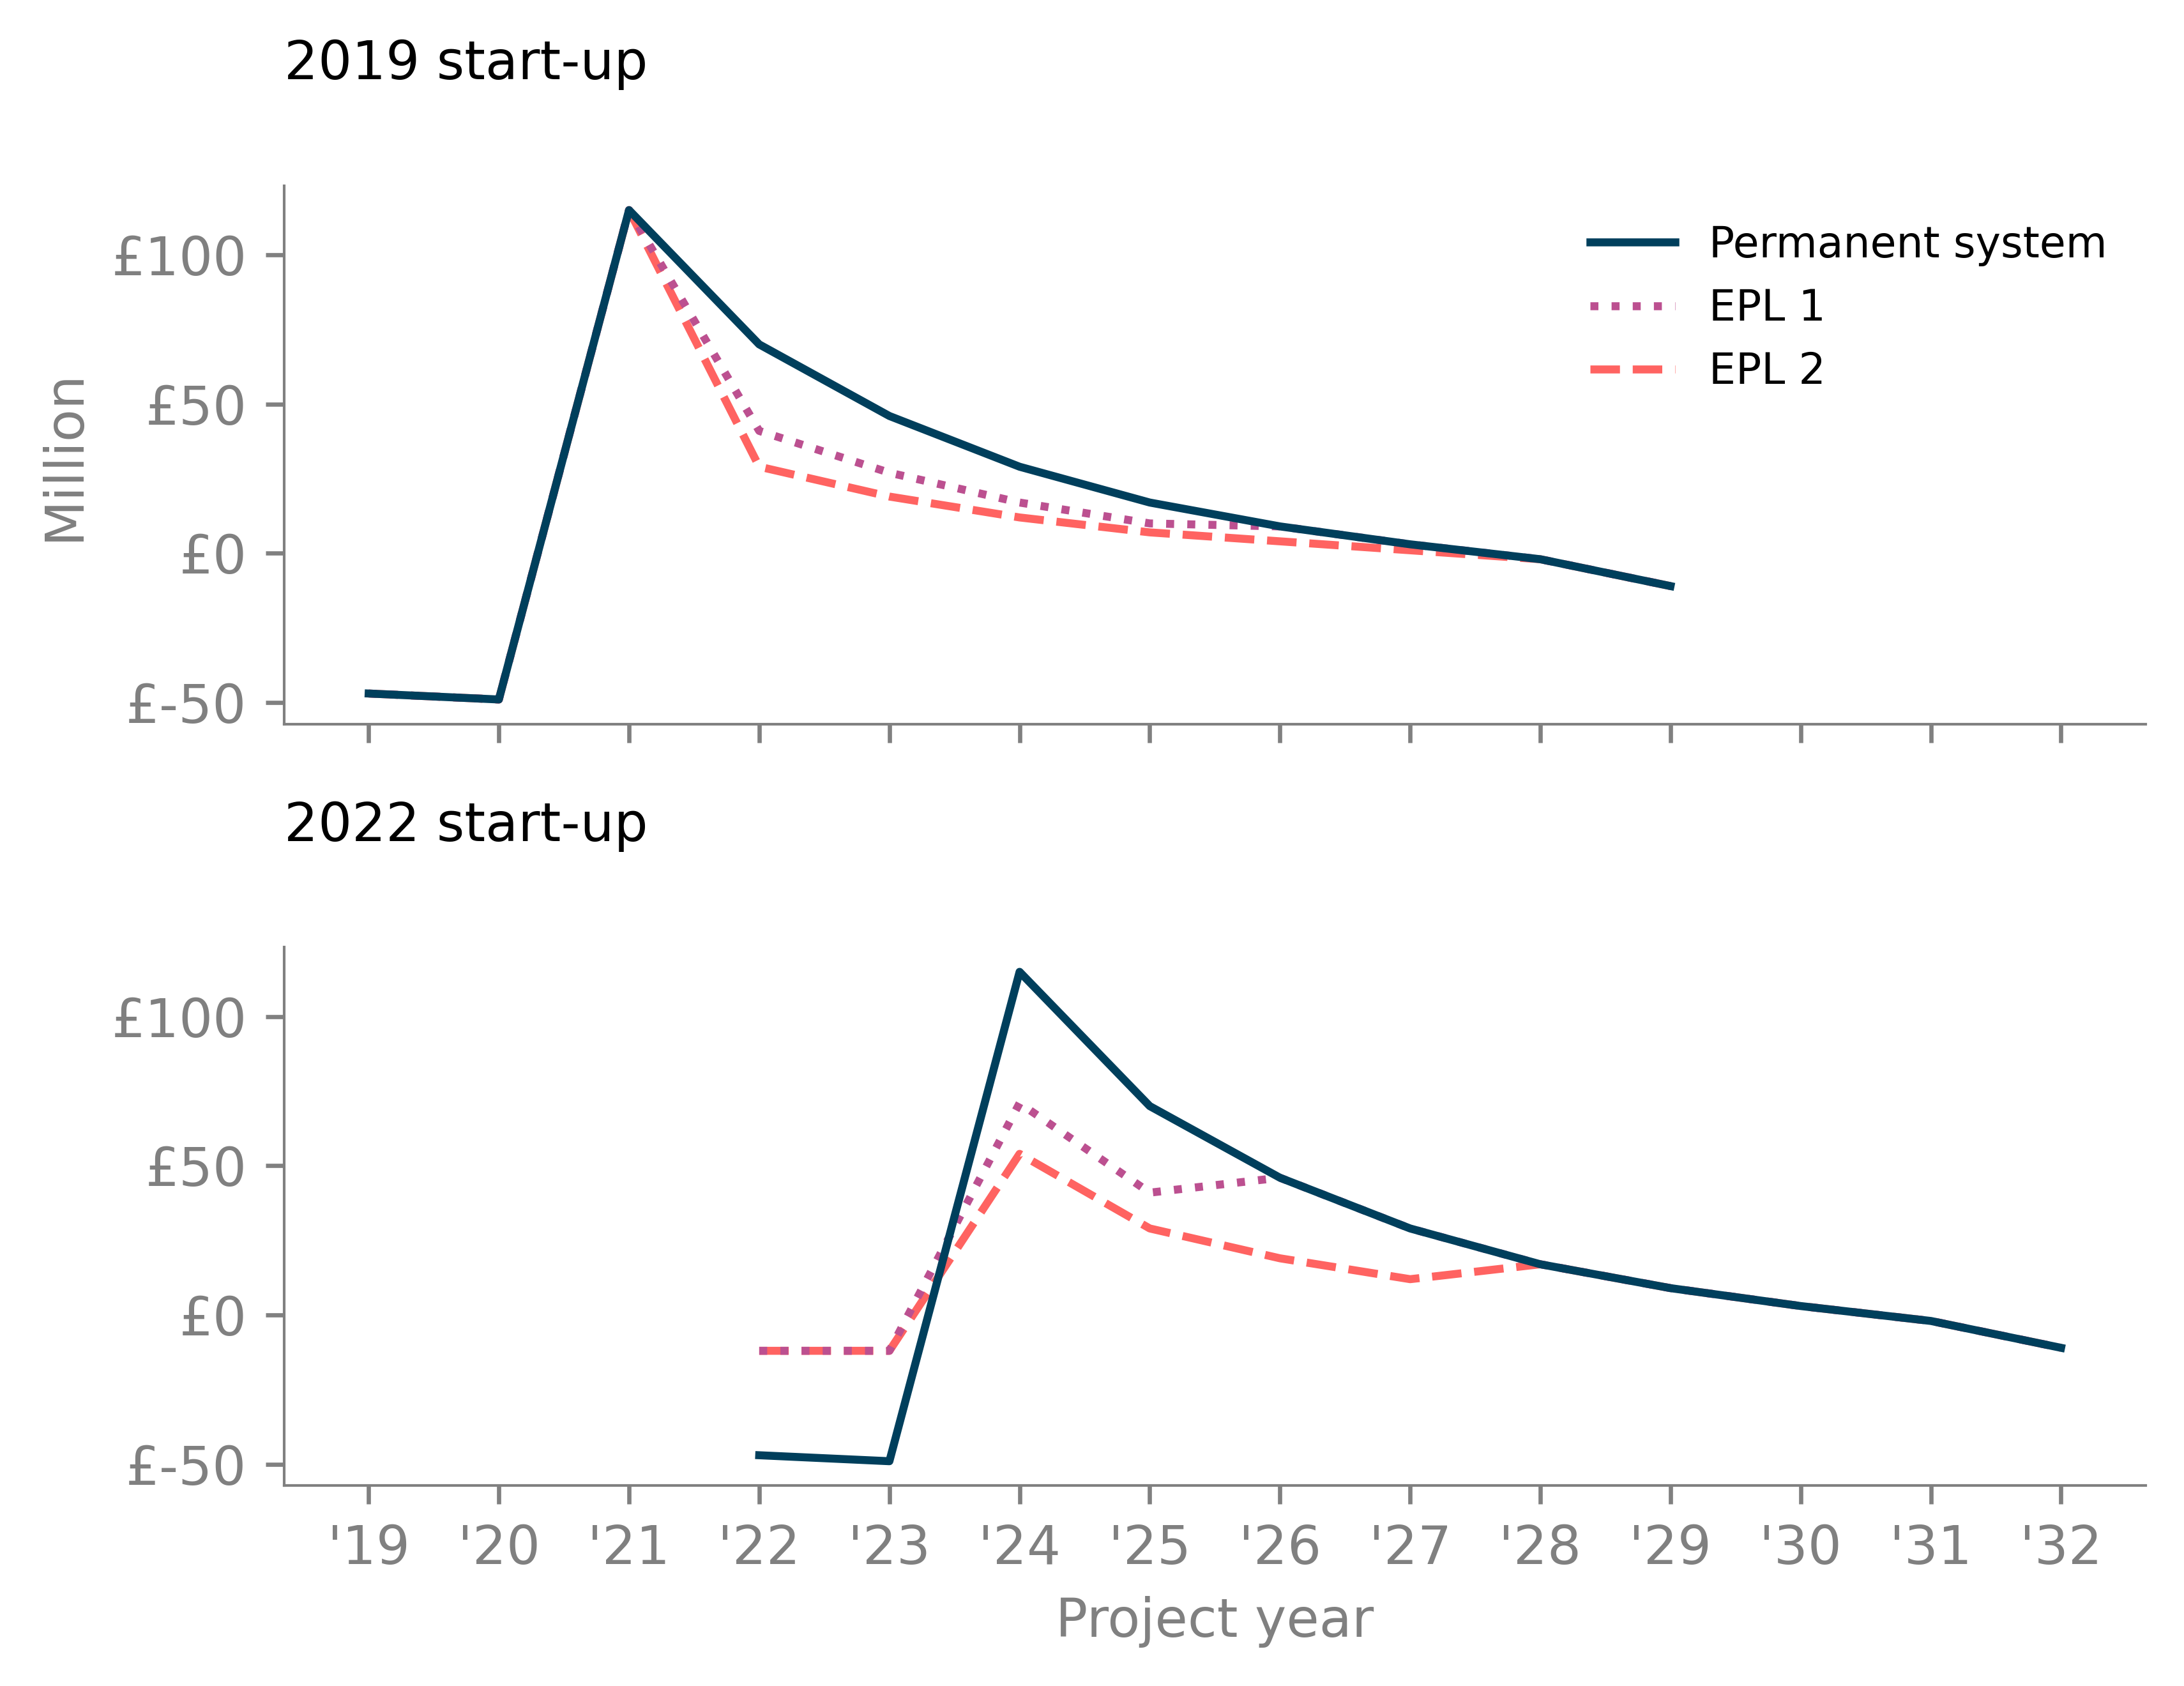

In [10]:
# Get relevant cashflows, create correct indexes for different startup years, then merge to plot

summer = cashflow_small_field['Post tax EPL summer other income']['post_tax_ncf']
autumn = cashflow_small_field['Post tax EPL autumn other income']['post_tax_ncf']

summer2019 = cashflow_small_field['Post tax EPL summer 2019 start other income']['post_tax_ncf']
autumn2019 = cashflow_small_field['Post tax EPL autumn 2019 start other income']['post_tax_ncf']

index2019 = pd.RangeIndex(start = 2019, stop = 2019 + len(summer2019))
index2022 = pd.RangeIndex(start = 2022, stop = 2022 + len(summer2019))

summer.index = index2022
autumn.index = index2022

summer2019.index = index2019
autumn2019.index = index2019

permanent = cashflow_small_field['Post tax no EPL other income']['post_tax_ncf'].values
permanent2019 = cashflow_small_field['Post tax no EPL other income']['post_tax_ncf'].values

permanent = pd.Series(permanent, index=index2022)
permanent2019 = pd.Series(permanent2019, index=index2019)


df = pd.concat([permanent, summer, autumn, permanent2019, summer2019, autumn2019], axis=1, sort=True)
df.columns = ['Permanent_2022', 'EPL1_2022', 'EPL2_2022', 'Permanent_2019', 'EPL1_2019', 'EPL2_2019']
df.index = df.index.map(str)

fig, (ax1,ax2) =plt.subplots(nrows=2, figsize=(5.8, 4.5), dpi=600, tight_layout=True, sharey=True, sharex=True)

ax1.plot(df['EPL2_2019'], label='EPL 2', c=color_highlight_orangered, ls='--')
ax1.plot(df['EPL1_2019'], label='EPL 1', c=color_highlight_red, ls=':')
ax1.plot(df['Permanent_2019'], label='Permanent system', color=color_base_line)

ax2.plot(df['EPL2_2022'], label='EPL 2', c=color_highlight_orangered, ls='--')
ax2.plot(df['EPL1_2022'], label="EPL 1", c=color_highlight_red, ls=':')
ax2.plot(df['Permanent_2022'], label='Permanent system', color=color_base_line)

ax1.set_title("2019 start-up", size=10, loc='left', pad=20)
ax2.set_title("2022 start-up", size=10, loc='left', pad=20)

ax2.set_xlabel("Project year")
ax1.set_ylabel("Million")

ax1.yaxis.set_major_formatter('£{x:1.0f}')
ax2.yaxis.set_major_formatter('£{x:1.0f}')

x_labels = [str("'" + year[2:4]) for year in df.index]
ax1.set_xticks(ticks = df.index, labels = "")
ax2.set_xticks(ticks = df.index, labels = x_labels)

# Legend styling
h, l = ax1.get_legend_handles_labels()
ax1.legend(handles=[h[2], h[1], h[0]], labels=[l[2], l[1], l[0]], frameon=False, loc='upper right')

fig.subplots_adjust(hspace=5)
fig.savefig("./plots/small_delayed_comparison.png")
plt.show()

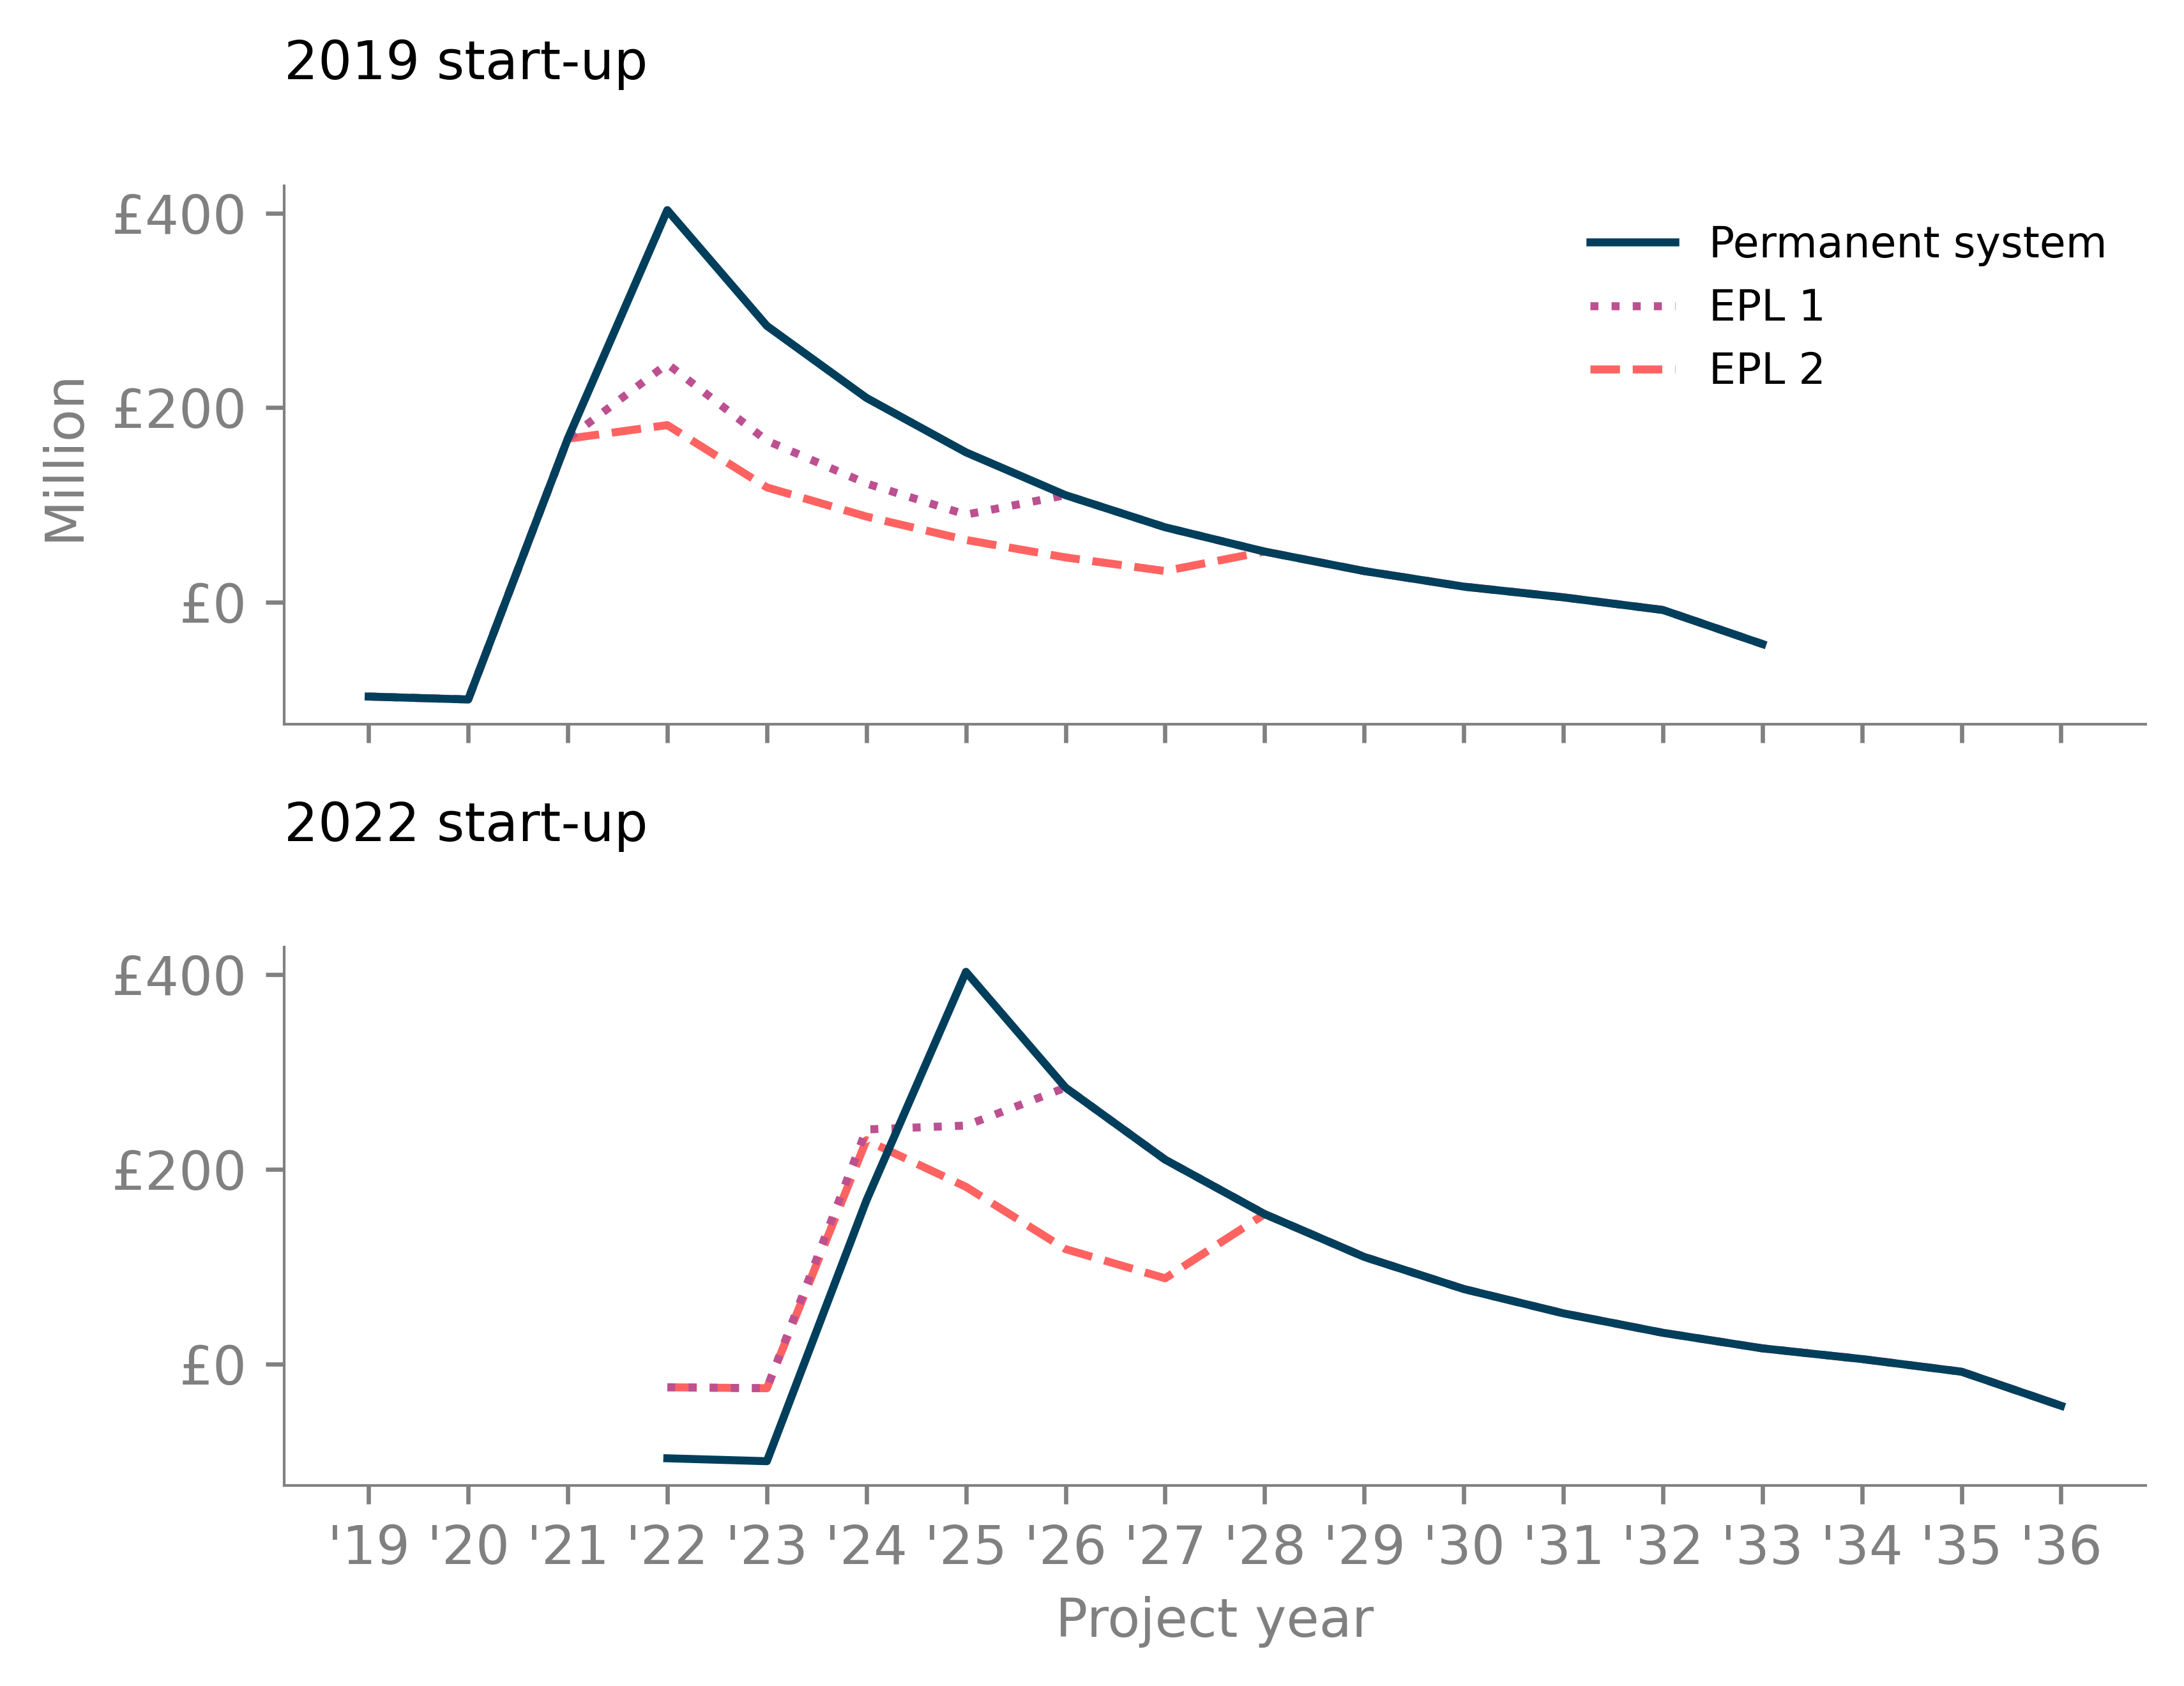

In [11]:
summer = cashflow_medium_field['Post tax EPL summer other income']['post_tax_ncf']
autumn = cashflow_medium_field['Post tax EPL autumn other income']['post_tax_ncf']

summer2019 = cashflow_medium_field['Post tax EPL summer 2019 start other income']['post_tax_ncf']
autumn2019 = cashflow_medium_field['Post tax EPL autumn 2019 start other income']['post_tax_ncf']

index2019 = pd.RangeIndex(start = 2019, stop = 2019 + len(summer2019))
index2022 = pd.RangeIndex(start = 2022, stop = 2022 + len(summer2019))

summer.index = index2022
autumn.index = index2022

summer2019.index = index2019
autumn2019.index = index2019

permanent = cashflow_medium_field['Post tax no EPL other income']['post_tax_ncf'].values
permanent2019 = cashflow_medium_field['Post tax no EPL other income']['post_tax_ncf'].values

permanent = pd.Series(permanent, index=index2022)
permanent2019 = pd.Series(permanent2019, index=index2019)


df = pd.concat([permanent, summer, autumn, permanent2019, summer2019, autumn2019], axis=1, sort=True)
df.columns = ['Permanent_2022', 'EPL1_2022', 'EPL2_2022', 'Permanent_2019', 'EPL1_2019', 'EPL2_2019']
df.index = df.index.map(str)

fig, (ax1,ax2) =plt.subplots(nrows=2, figsize=(5.8, 4.5), dpi=600, tight_layout=True, sharey=True, sharex=True)

ax1.plot(df['EPL2_2019'], label='EPL 2', c=color_highlight_orangered, ls='--')
ax1.plot(df['EPL1_2019'], label='EPL 1', c=color_highlight_red, ls=':')
ax1.plot(df['Permanent_2019'], label='Permanent system', color=color_base_line)

ax2.plot(df['EPL2_2022'], label='EPL 2', c=color_highlight_orangered, ls='--')
ax2.plot(df['EPL1_2022'], label="EPL 1", c=color_highlight_red, ls=':')
ax2.plot(df['Permanent_2022'], label='Permanent system', color=color_base_line)

ax1.set_title("2019 start-up", size=10, loc='left', pad=20)
ax2.set_title("2022 start-up", size=10, loc='left', pad=20)

ax2.set_xlabel("Project year")
ax1.set_ylabel("Million")

ax1.yaxis.set_major_formatter('£{x:1.0f}')
ax2.yaxis.set_major_formatter('£{x:1.0f}')

x_labels = [str("'" + year[2:4]) for year in df.index]
ax1.set_xticks(ticks = df.index, labels = "")
ax2.set_xticks(ticks = df.index, labels = x_labels)

# Legend styling
h, l = ax1.get_legend_handles_labels()
ax1.legend(handles=[h[2], h[1], h[0]], labels=[l[2], l[1], l[0]], frameon=False, loc='upper right')


fig.subplots_adjust(hspace=5)
fig.savefig("./plots/medium_delayed_comparison.png")
plt.show()

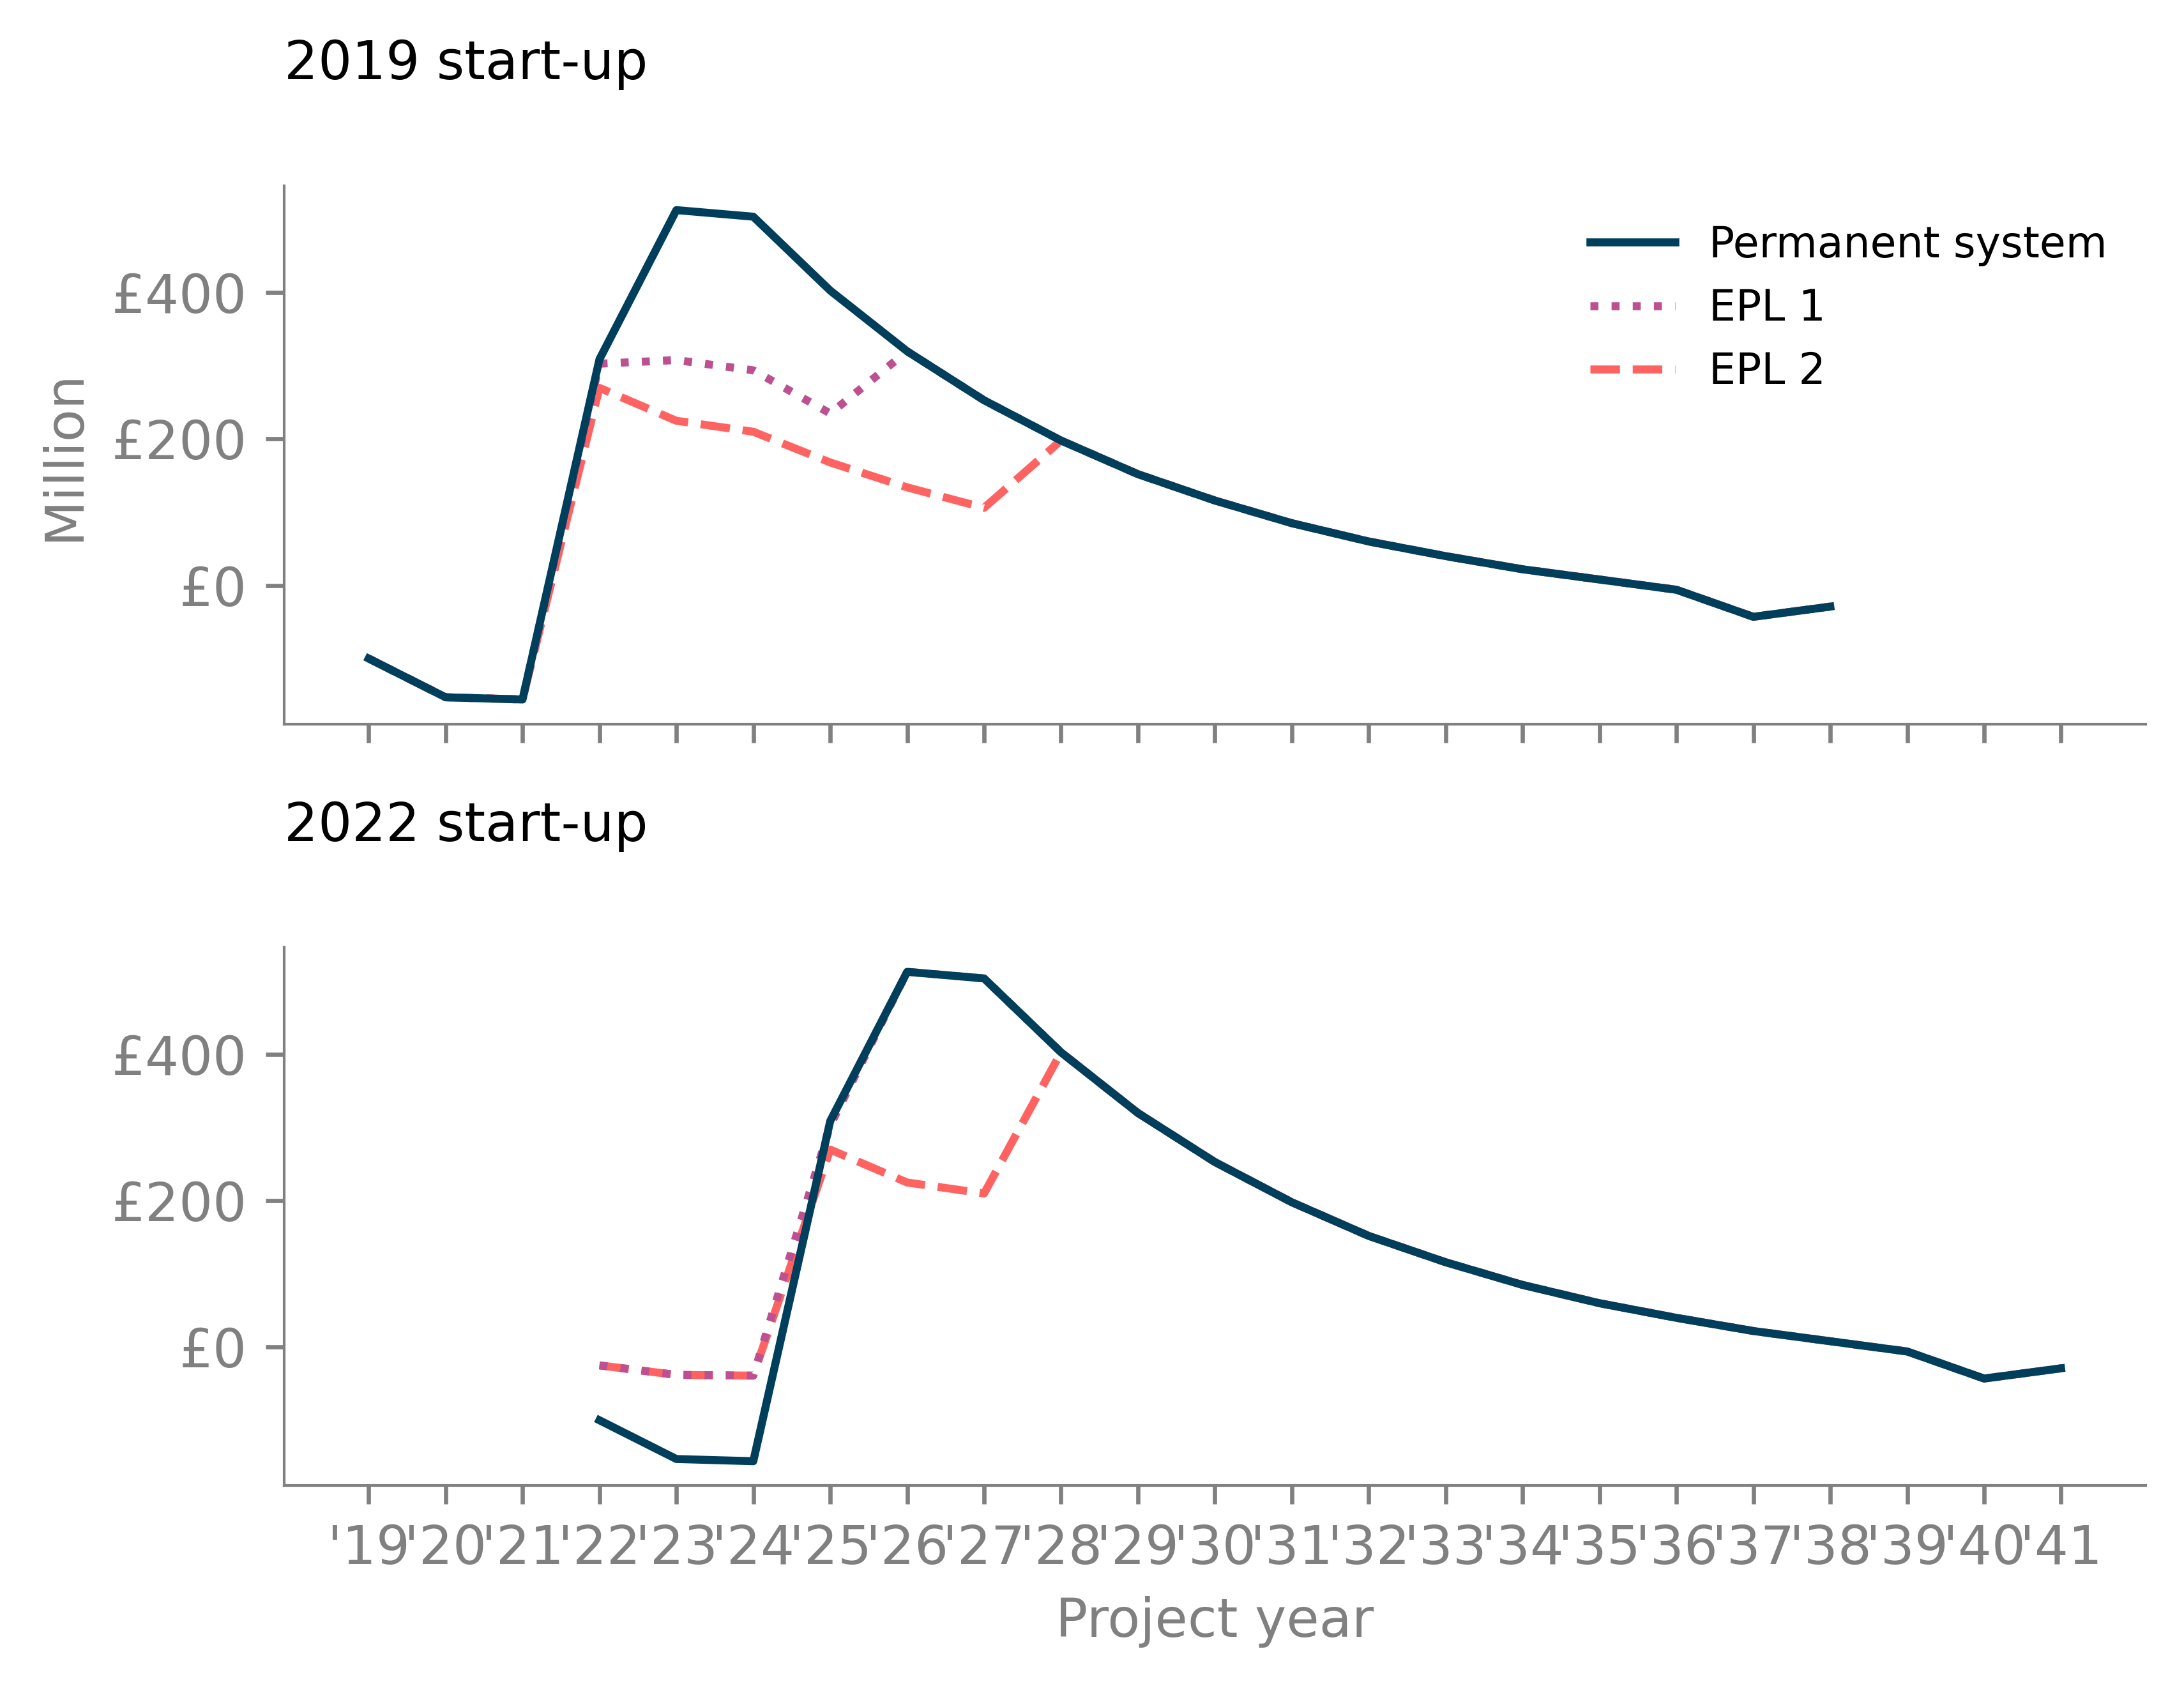

In [12]:
summer = cashflow_large_field['Post tax EPL summer other income']['post_tax_ncf']
autumn = cashflow_large_field['Post tax EPL autumn other income']['post_tax_ncf']

summer2019 = cashflow_large_field['Post tax EPL summer 2019 start other income']['post_tax_ncf']
autumn2019 = cashflow_large_field['Post tax EPL autumn 2019 start other income']['post_tax_ncf']

index2019 = pd.RangeIndex(start = 2019, stop = 2019 + len(summer2019))
index2022 = pd.RangeIndex(start = 2022, stop = 2022 + len(summer2019))

summer.index = index2022
autumn.index = index2022

summer2019.index = index2019
autumn2019.index = index2019

permanent = cashflow_large_field['Post tax no EPL other income']['post_tax_ncf'].values
permanent2019 = cashflow_large_field['Post tax no EPL other income']['post_tax_ncf'].values

permanent = pd.Series(permanent, index=index2022)
permanent2019 = pd.Series(permanent2019, index=index2019)


df = pd.concat([permanent, summer, autumn, permanent2019, summer2019, autumn2019], axis=1, sort=True)
df.columns = ['Permanent_2022', 'EPL1_2022', 'EPL2_2022', 'Permanent_2019', 'EPL1_2019', 'EPL2_2019']
df.index = df.index.map(str)

fig, (ax1,ax2) =plt.subplots(nrows=2, figsize=(5.8, 4.5), dpi=600, tight_layout=True, sharey=True, sharex=True)

ax1.plot(df['EPL2_2019'], label='EPL 2', c=color_highlight_orangered, ls='--')
ax1.plot(df['EPL1_2019'], label='EPL 1', c=color_highlight_red, ls=':')
ax1.plot(df['Permanent_2019'], label='Permanent system', color=color_base_line)

ax2.plot(df['EPL2_2022'], label='EPL 2', c=color_highlight_orangered, ls='--')
ax2.plot(df['EPL1_2022'], label="EPL 1", c=color_highlight_red, ls=':')
ax2.plot(df['Permanent_2022'], label='Permanent system', color=color_base_line)

ax1.set_title("2019 start-up", size=10, loc='left', pad=20)
ax2.set_title("2022 start-up", size=10, loc='left', pad=20)

ax2.set_xlabel("Project year")
ax1.set_ylabel("Million")

ax1.yaxis.set_major_formatter('£{x:1.0f}')
ax2.yaxis.set_major_formatter('£{x:1.0f}')

x_labels = [str("'" + year[2:4]) for year in df.index]
ax1.set_xticks(ticks = df.index, labels = "")
ax2.set_xticks(ticks = df.index, labels = x_labels)

# Legend styling
h, l = ax1.get_legend_handles_labels()
ax1.legend(handles=[h[2], h[1], h[0]], labels=[l[2], l[1], l[0]], frameon=False, loc='upper right')


fig.subplots_adjust(hspace=5)
fig.savefig("./plots/large_delayed_comparison.png")
plt.show()

# NPV comparisons and cashflow impact

In [13]:
results_small_field['npv_results'].keys()

Index(['Pre tax', 'Post tax no EPL other income',
       'Post tax EPL summer other income', 'Post tax EPL autumn other income',
       'Post tax EPL summer 2019 start other income',
       'Post tax EPL autumn 2019 start other income',
       'Post tax no EPL no other income',
       'Post tax EPL summer no other income',
       'Post tax EPL autumn no other income',
       'Post tax EPL summer 2019 start no other income',
       'Post tax EPL autumn 2019 start no other income'],
      dtype='object')

In [14]:
# NPV table for different categories

s_pre_tax = results_small_field['npv_results']['Pre tax']
s_permanent = results_small_field['npv_results']['Post tax no EPL other income']
s_permanent_no = results_small_field['npv_results']['Post tax no EPL no other income']
s_summer = results_small_field['npv_results']['Post tax EPL summer other income']
s_autumn = results_small_field['npv_results']['Post tax EPL autumn other income']
s_summer_no = results_small_field['npv_results']['Post tax EPL summer no other income']
s_autumn_no = results_small_field['npv_results']['Post tax EPL autumn no other income']


m_pre_tax = results_medium_field['npv_results']['Pre tax']
m_permanent = results_medium_field['npv_results']['Post tax no EPL other income']
m_permanent_no = results_medium_field['npv_results']['Post tax no EPL no other income']
m_summer =results_medium_field['npv_results']['Post tax EPL summer other income']
m_autumn = results_medium_field['npv_results']['Post tax EPL autumn other income']
m_summer_no = results_medium_field['npv_results']['Post tax EPL summer no other income']
m_autumn_no = results_medium_field['npv_results']['Post tax EPL autumn no other income']

l_pre_tax = results_large_field['npv_results']['Pre tax']
l_permanent = results_large_field['npv_results']['Post tax no EPL other income']
l_permanent_no = results_large_field['npv_results']['Post tax no EPL no other income']
l_summer =results_large_field['npv_results']['Post tax EPL summer other income']
l_autumn = results_large_field['npv_results']['Post tax EPL autumn other income']
l_summer_no = results_large_field['npv_results']['Post tax EPL summer no other income']
l_autumn_no = results_large_field['npv_results']['Post tax EPL autumn no other income']



data = np.array([[s_pre_tax, s_permanent, s_summer, s_autumn, s_permanent_no, s_summer_no, s_autumn_no],
                 [m_pre_tax, m_permanent, m_summer, m_autumn, m_permanent_no, m_summer_no, m_autumn_no],
                 [l_pre_tax, l_permanent, l_summer, l_autumn, l_permanent_no, l_summer_no, l_autumn_no]], np.int32)



arrays = [["Pre tax", "Other income", 'Other income', 'Other income', "No income", 'No income', 'No income' ], ['','Permanent', "EPL 1", "EPL 2", "Permanent", "EPL 1", "EPL 2"]]
columns = pd.MultiIndex.from_arrays(arrays, names=('Tax case', 'EPL case'))

table = pd.DataFrame(data, index = ["Field 1 - Small", "Field 2 - Medium", "Field 3 - Large"],
             columns = columns)
table.index.name = "Fields"
table

Tax case         Pre tax Other income             No income            
EPL case                    Permanent EPL 1 EPL 2 Permanent EPL 1 EPL 2
Fields                                                                 
Field 1 - Small      162          105   117    69        94    68     5
Field 2 - Medium    1024          711   796   570       606   569   294
Field 3 - Large     1692         1101  1368   998      1001  1086   643

In [15]:
# Plot cashflows and check 
cashflow_medium_field.keys()

Index(['Pre tax', 'Post tax no EPL other income',
       'Post tax EPL summer other income', 'Post tax EPL autumn other income',
       'Post tax EPL summer 2019 start other income',
       'Post tax EPL autumn 2019 start other income',
       'Post tax no EPL no other income',
       'Post tax EPL summer no other income',
       'Post tax EPL autumn no other income',
       'Post tax EPL summer 2019 start no other income',
       'Post tax EPL autumn 2019 start no other income'],
      dtype='object')

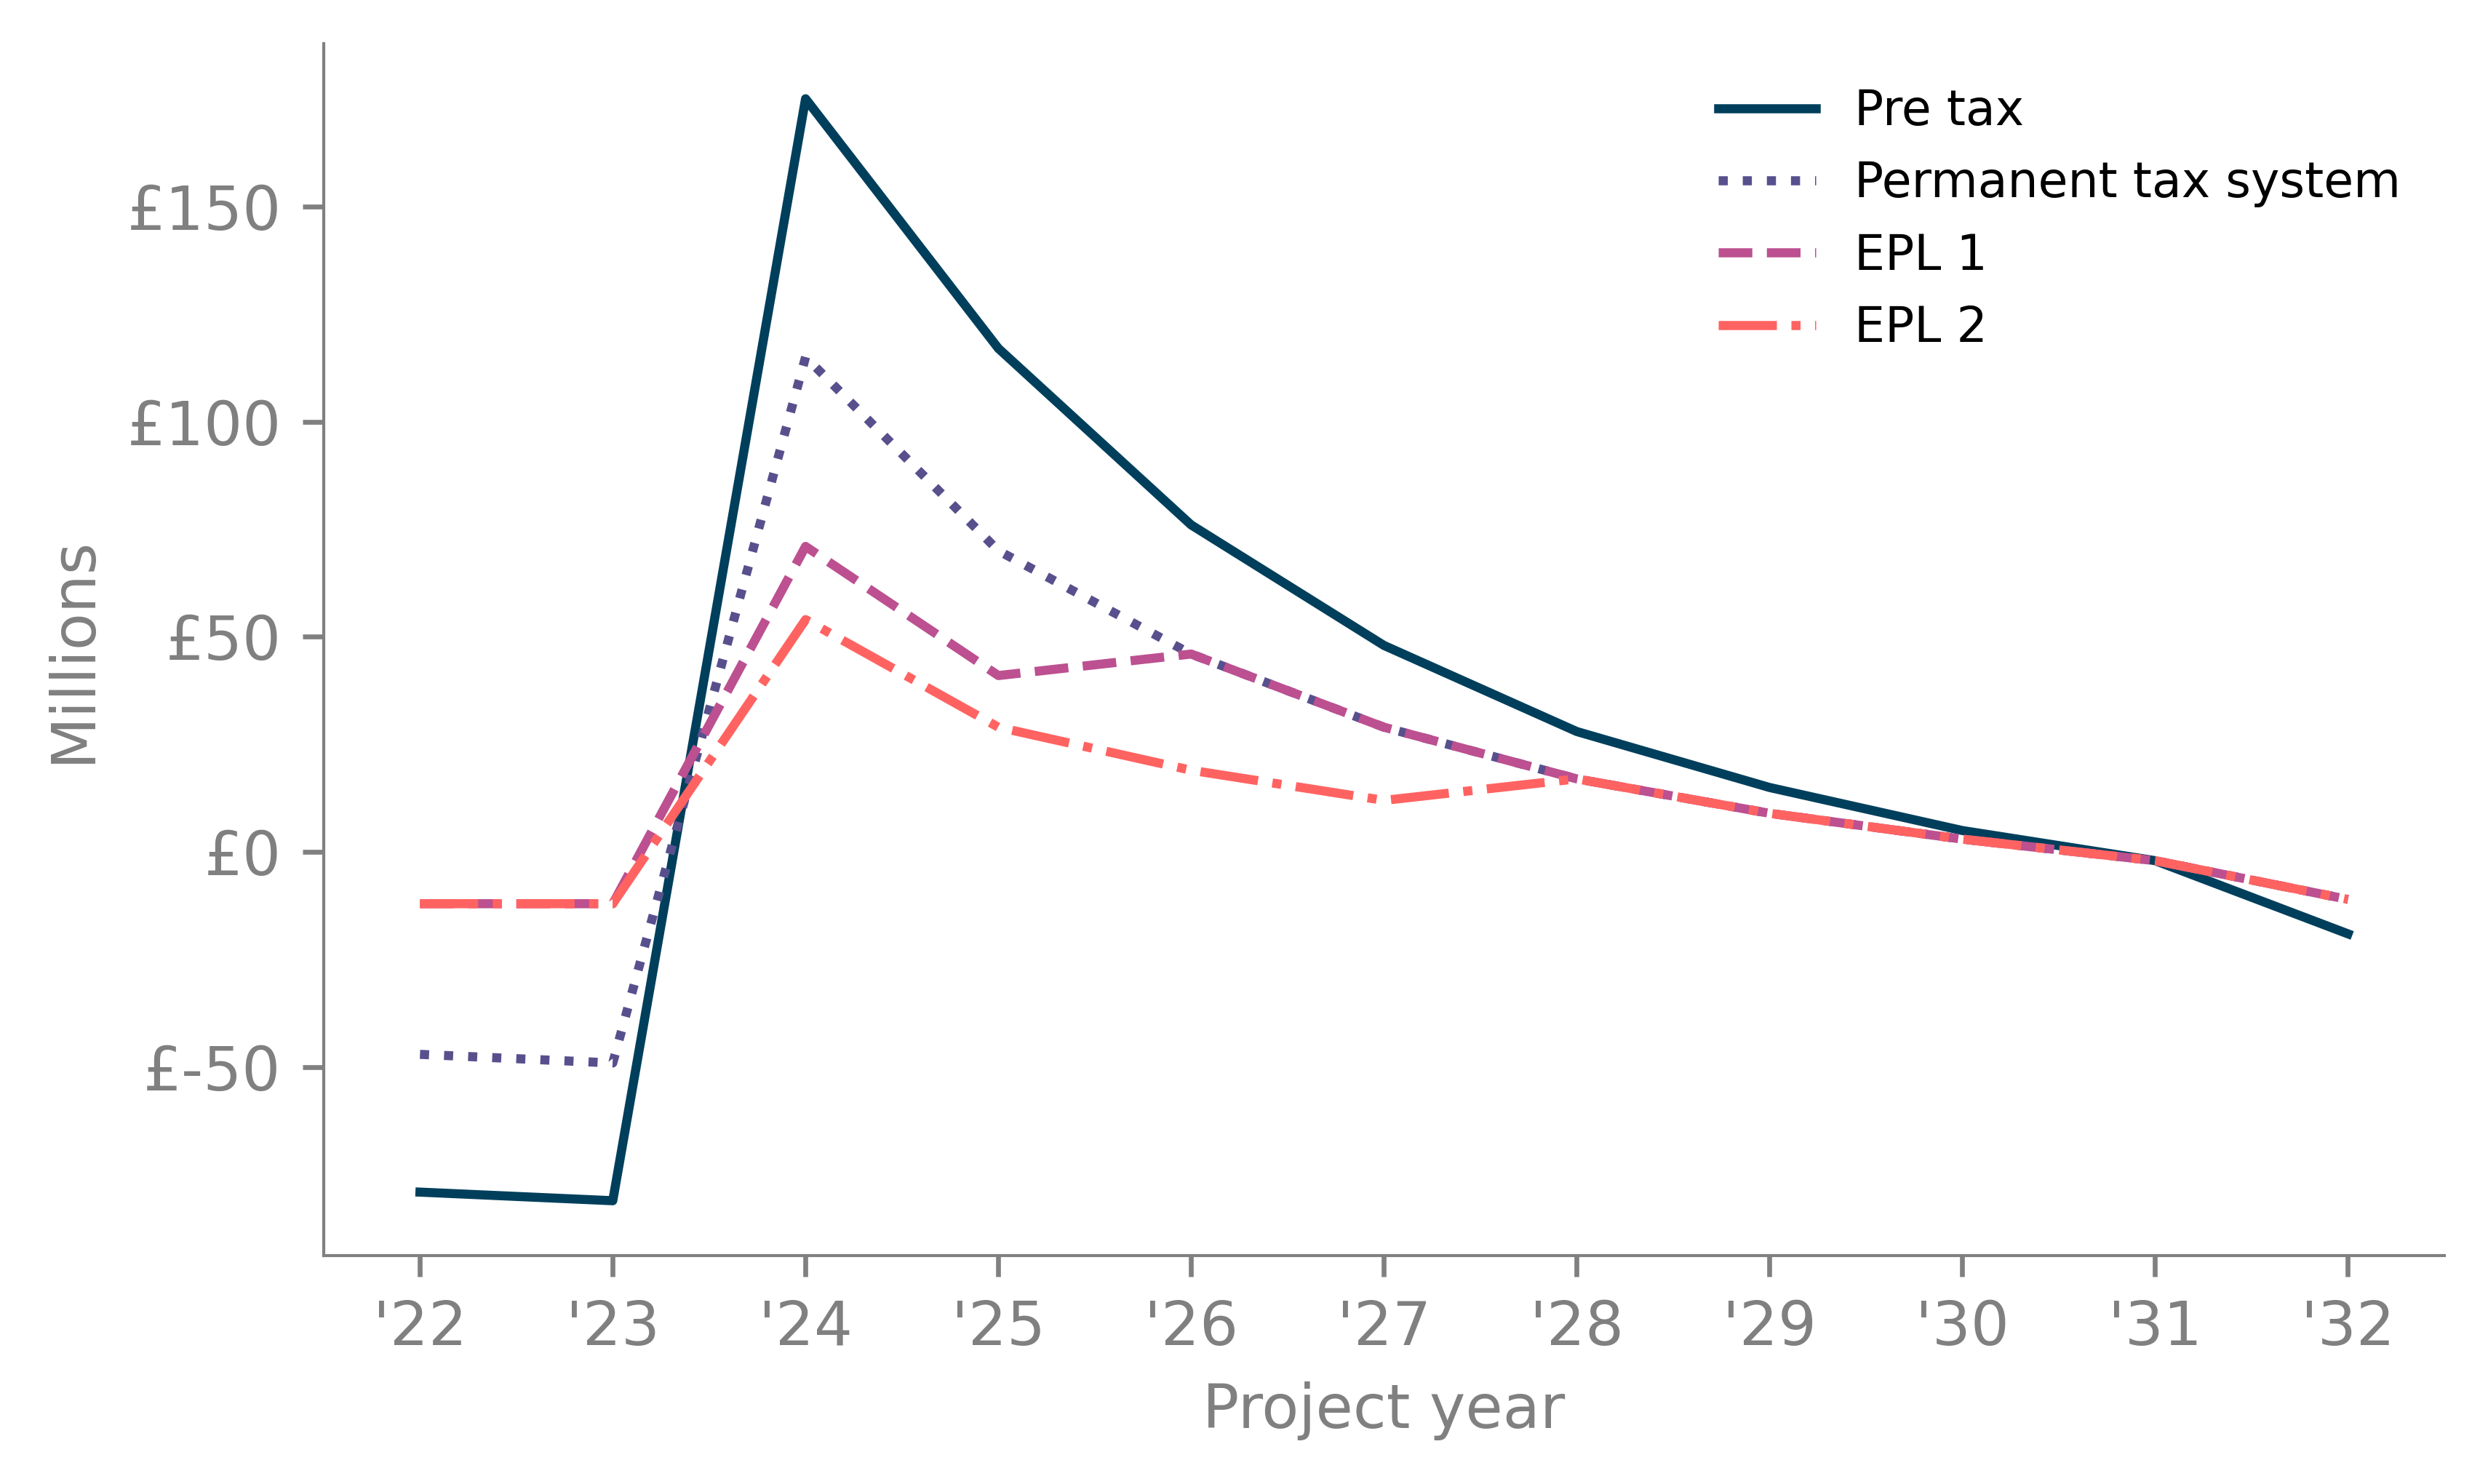

In [16]:
pre_tax = cashflow_small_field['Pre tax'].ncf
tax1 = cashflow_small_field['Post tax no EPL other income'].post_tax_ncf
tax2 = cashflow_small_field['Post tax EPL summer other income'].post_tax_ncf
tax3 = cashflow_small_field['Post tax EPL autumn other income'].post_tax_ncf

index2022 = pd.RangeIndex(start = 2022, stop = 2022 + len(pre_tax))
pre_tax.index = index2022
pre_tax.index = pre_tax.index.map(str)
tax1.index = index2022
tax1.index = tax1.index.map(str)
tax2.index = index2022
tax2.index = tax2.index.map(str)
tax3.index = index2022
tax3.index = tax3.index.map(str)

fig, ax =plt.subplots(figsize=(5.8, 3.5), dpi=600, tight_layout=True)
ax.plot(pre_tax, label='Pre tax', c=color_base_line)
ax.plot(tax1, label="Permanent tax system", c=color_highlight_purple, ls=':')
ax.plot(tax2, label='EPL 1', c=color_highlight_red, ls='--')
ax.plot(tax3, label='EPL 2', c=color_highlight_orangered, ls='-.')

ax.set_xlabel("Project year")
ax.set_ylabel("Millions")

x_labels = [str("'" + year[2:4]) for year in pre_tax.index]
ax.set_xticks(ticks = pre_tax.index, labels = x_labels)

ax.yaxis.set_major_formatter('£{x:1.0f}')

ax.legend(frameon=False)
fig.savefig("./plots/small_cashflows_full_comparison.png")

plt.show()

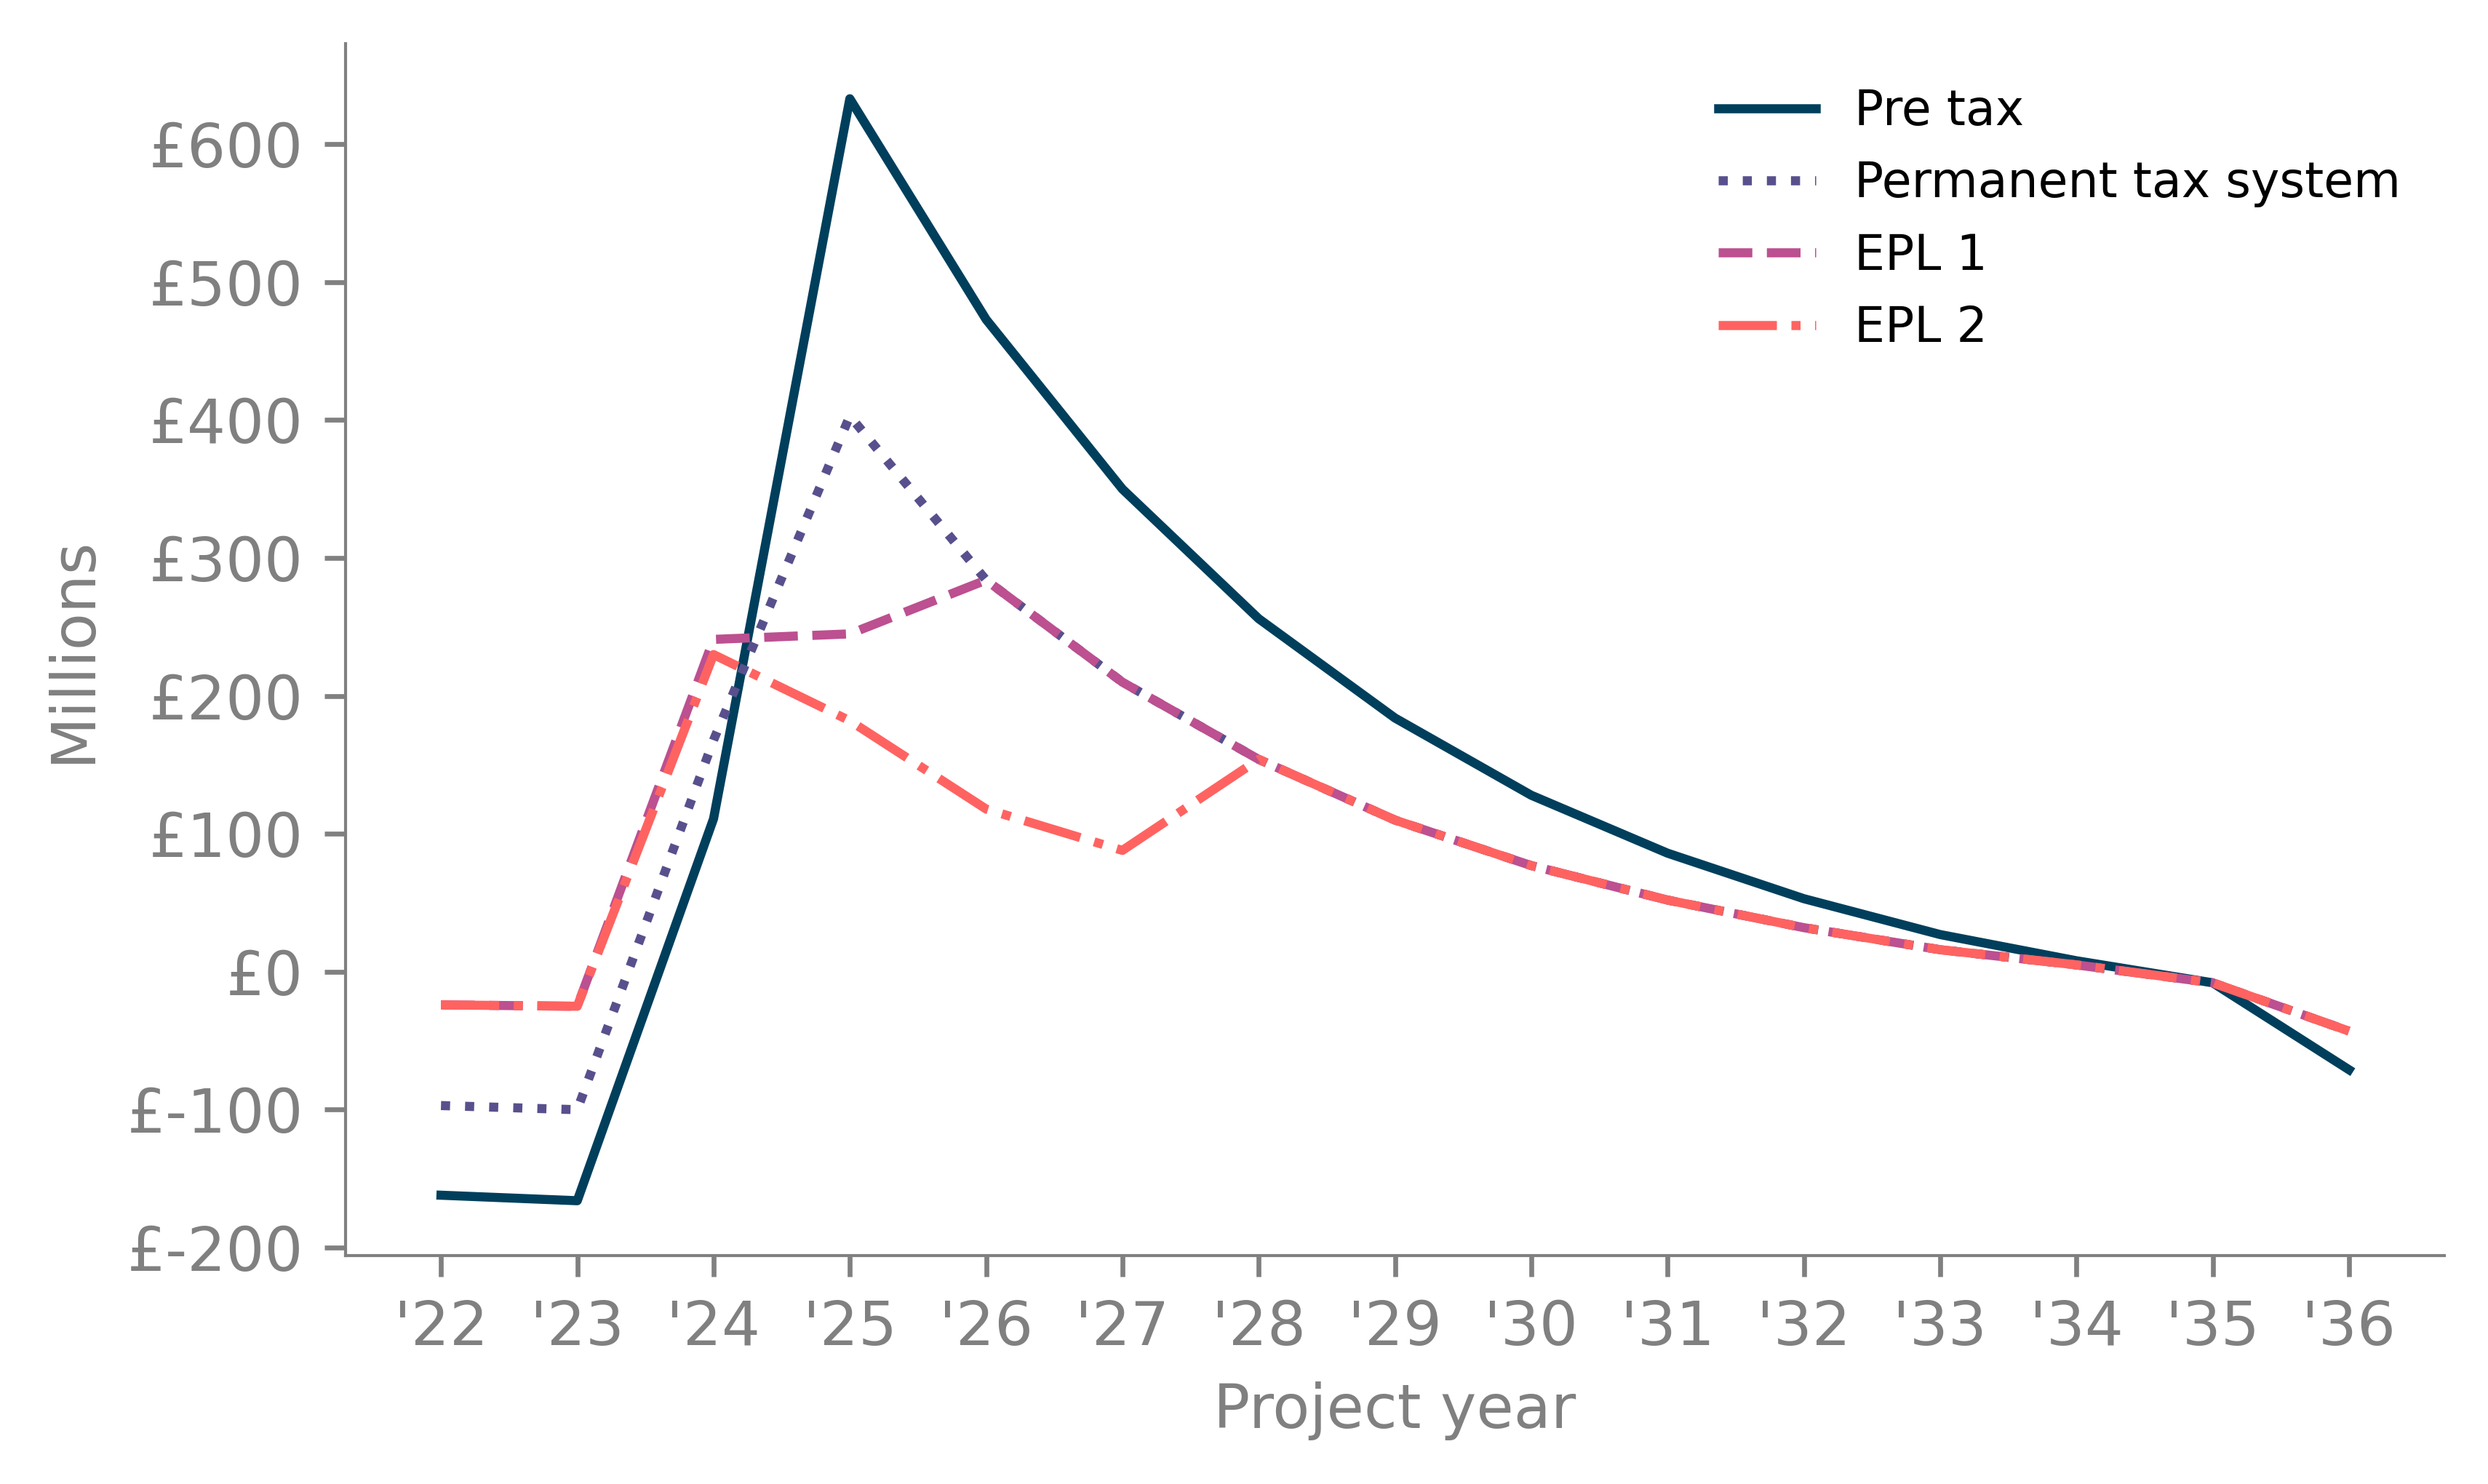

In [17]:
pre_tax = cashflow_medium_field['Pre tax'].ncf
tax1 = cashflow_medium_field['Post tax no EPL other income'].post_tax_ncf
tax2 = cashflow_medium_field['Post tax EPL summer other income'].post_tax_ncf
tax3 = cashflow_medium_field['Post tax EPL autumn other income'].post_tax_ncf

index2022 = pd.RangeIndex(start = 2022, stop = 2022 + len(pre_tax))
pre_tax.index = index2022
pre_tax.index = pre_tax.index.map(str)
tax1.index = index2022
tax1.index = tax1.index.map(str)
tax2.index = index2022
tax2.index = tax2.index.map(str)
tax3.index = index2022
tax3.index = tax3.index.map(str)

fig, ax =plt.subplots(figsize=(5.8, 3.5), dpi=600, tight_layout=True)
ax.plot(pre_tax, label='Pre tax', c=color_base_line)
ax.plot(tax1, label="Permanent tax system", c=color_highlight_purple, ls=':')
ax.plot(tax2, label='EPL 1', c=color_highlight_red, ls='--')
ax.plot(tax3, label='EPL 2', c=color_highlight_orangered, ls='-.')

ax.set_xlabel("Project year")
ax.set_ylabel("Millions")

x_labels = [str("'" + year[2:4]) for year in pre_tax.index]
ax.set_xticks(ticks = pre_tax.index, labels = x_labels)

ax.yaxis.set_major_formatter('£{x:1.0f}')

ax.legend(frameon=False)
fig.savefig("./plots/medium_cashflows_full_comparison.png")

plt.show()


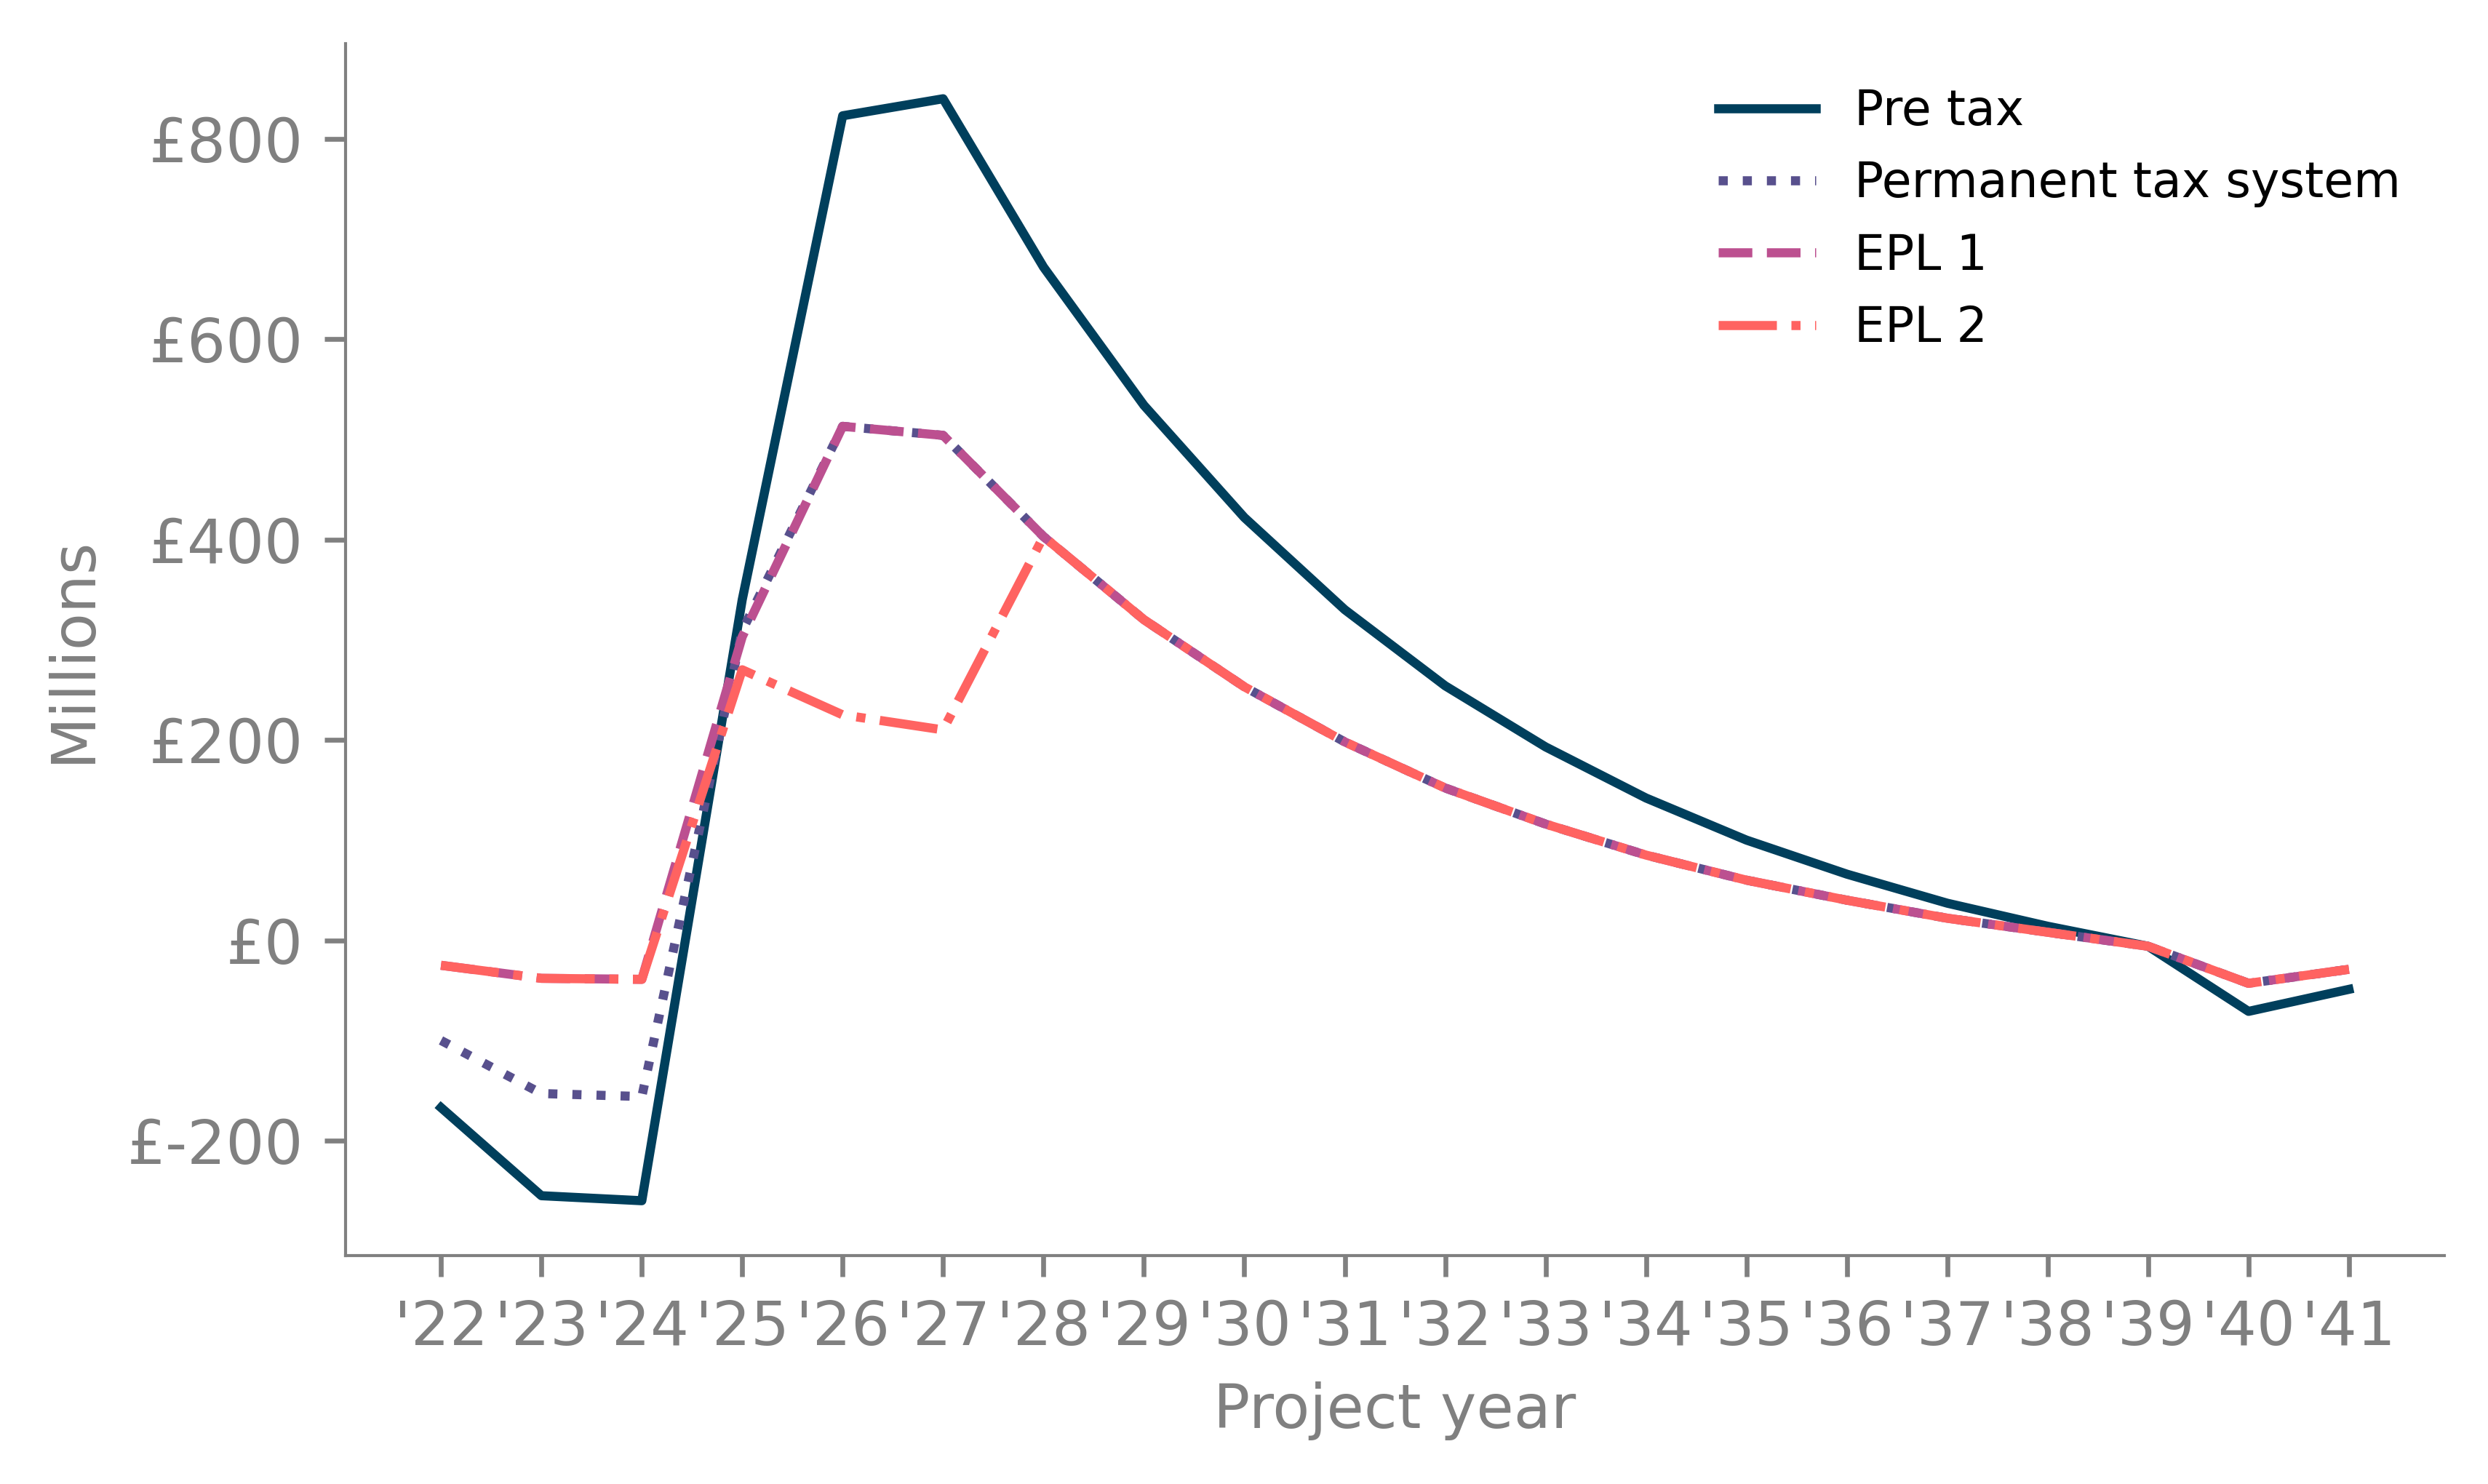

In [18]:
pre_tax = cashflow_large_field['Pre tax'].ncf
tax1 = cashflow_large_field['Post tax no EPL other income'].post_tax_ncf
tax2 = cashflow_large_field['Post tax EPL summer other income'].post_tax_ncf
tax3 = cashflow_large_field['Post tax EPL autumn other income'].post_tax_ncf

index2022 = pd.RangeIndex(start = 2022, stop = 2022 + len(pre_tax))
pre_tax.index = index2022
pre_tax.index = pre_tax.index.map(str)
tax1.index = index2022
tax1.index = tax1.index.map(str)
tax2.index = index2022
tax2.index = tax2.index.map(str)
tax3.index = index2022
tax3.index = tax3.index.map(str)

fig, ax =plt.subplots(figsize=(5.8, 3.5), dpi=600, tight_layout=True)
ax.plot(pre_tax, label='Pre tax', c=color_base_line)
ax.plot(tax1, label="Permanent tax system", c=color_highlight_purple, ls=':')
ax.plot(tax2, label='EPL 1', c=color_highlight_red, ls='--')
ax.plot(tax3, label='EPL 2', c=color_highlight_orangered, ls='-.')

ax.set_xlabel("Project year")
ax.set_ylabel("Millions")

x_labels = [str("'" + year[2:4]) for year in pre_tax.index]
ax.set_xticks(ticks = pre_tax.index, labels = x_labels)

ax.yaxis.set_major_formatter('£{x:1.0f}')

ax.legend(frameon=False)
fig.savefig("./plots/large_cashflows_full_comparison.png")

plt.show()

# Cash flow plots for case where there is no other income available

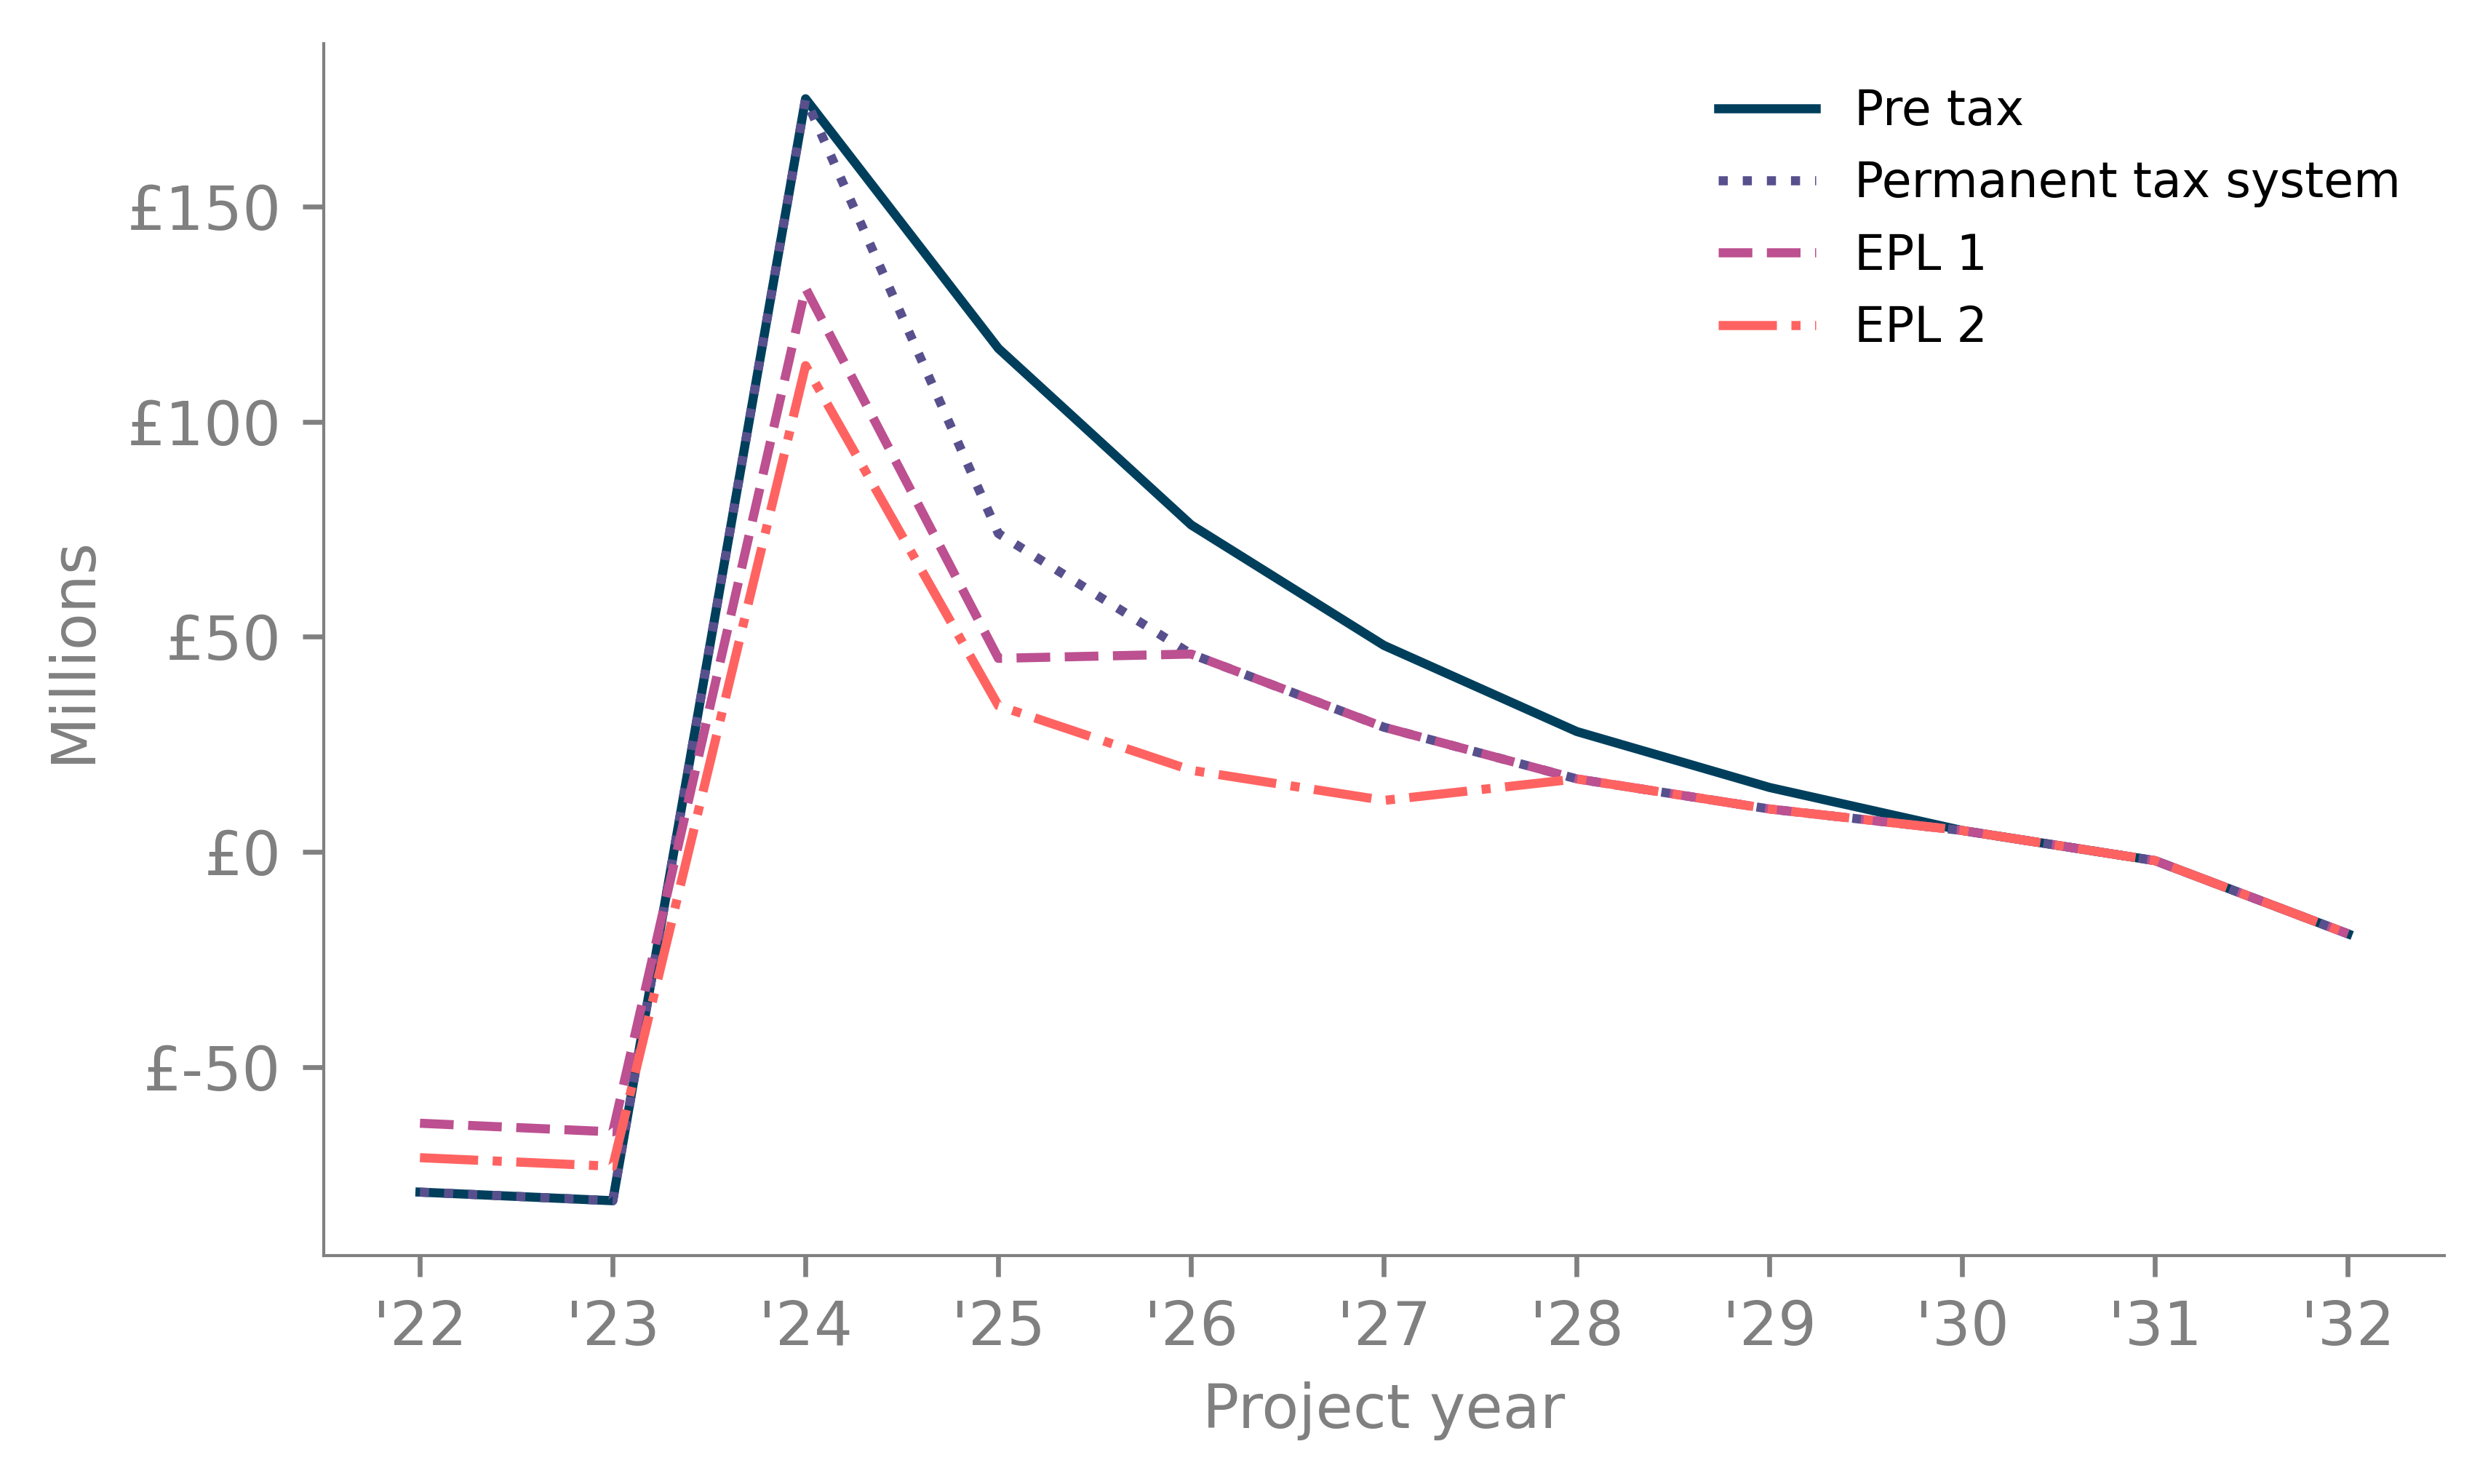

In [19]:
pre_tax = cashflow_small_field['Pre tax'].ncf
tax1 = cashflow_small_field['Post tax no EPL no other income'].post_tax_ncf
tax2 = cashflow_small_field['Post tax EPL summer no other income'].post_tax_ncf
tax3 = cashflow_small_field['Post tax EPL autumn no other income'].post_tax_ncf

index2022 = pd.RangeIndex(start = 2022, stop = 2022 + len(pre_tax))
pre_tax.index = index2022
pre_tax.index = pre_tax.index.map(str)
tax1.index = index2022
tax1.index = tax1.index.map(str)
tax2.index = index2022
tax2.index = tax2.index.map(str)
tax3.index = index2022
tax3.index = tax3.index.map(str)

fig, ax =plt.subplots(figsize=(5.8, 3.5), dpi=600, tight_layout=True)
ax.plot(pre_tax, label='Pre tax', c=color_base_line)
ax.plot(tax1, label="Permanent tax system", c=color_highlight_purple, ls=':')
ax.plot(tax2, label='EPL 1', c=color_highlight_red, ls='--')
ax.plot(tax3, label='EPL 2', c=color_highlight_orangered, ls='-.')

ax.set_xlabel("Project year")
ax.set_ylabel("Millions")

x_labels = [str("'" + year[2:4]) for year in pre_tax.index]
ax.set_xticks(ticks = pre_tax.index, labels = x_labels)

ax.yaxis.set_major_formatter('£{x:1.0f}')

ax.legend(frameon=False)
fig.savefig("./plots/small_cashflows_full_noincome_comparison.png")

plt.show()

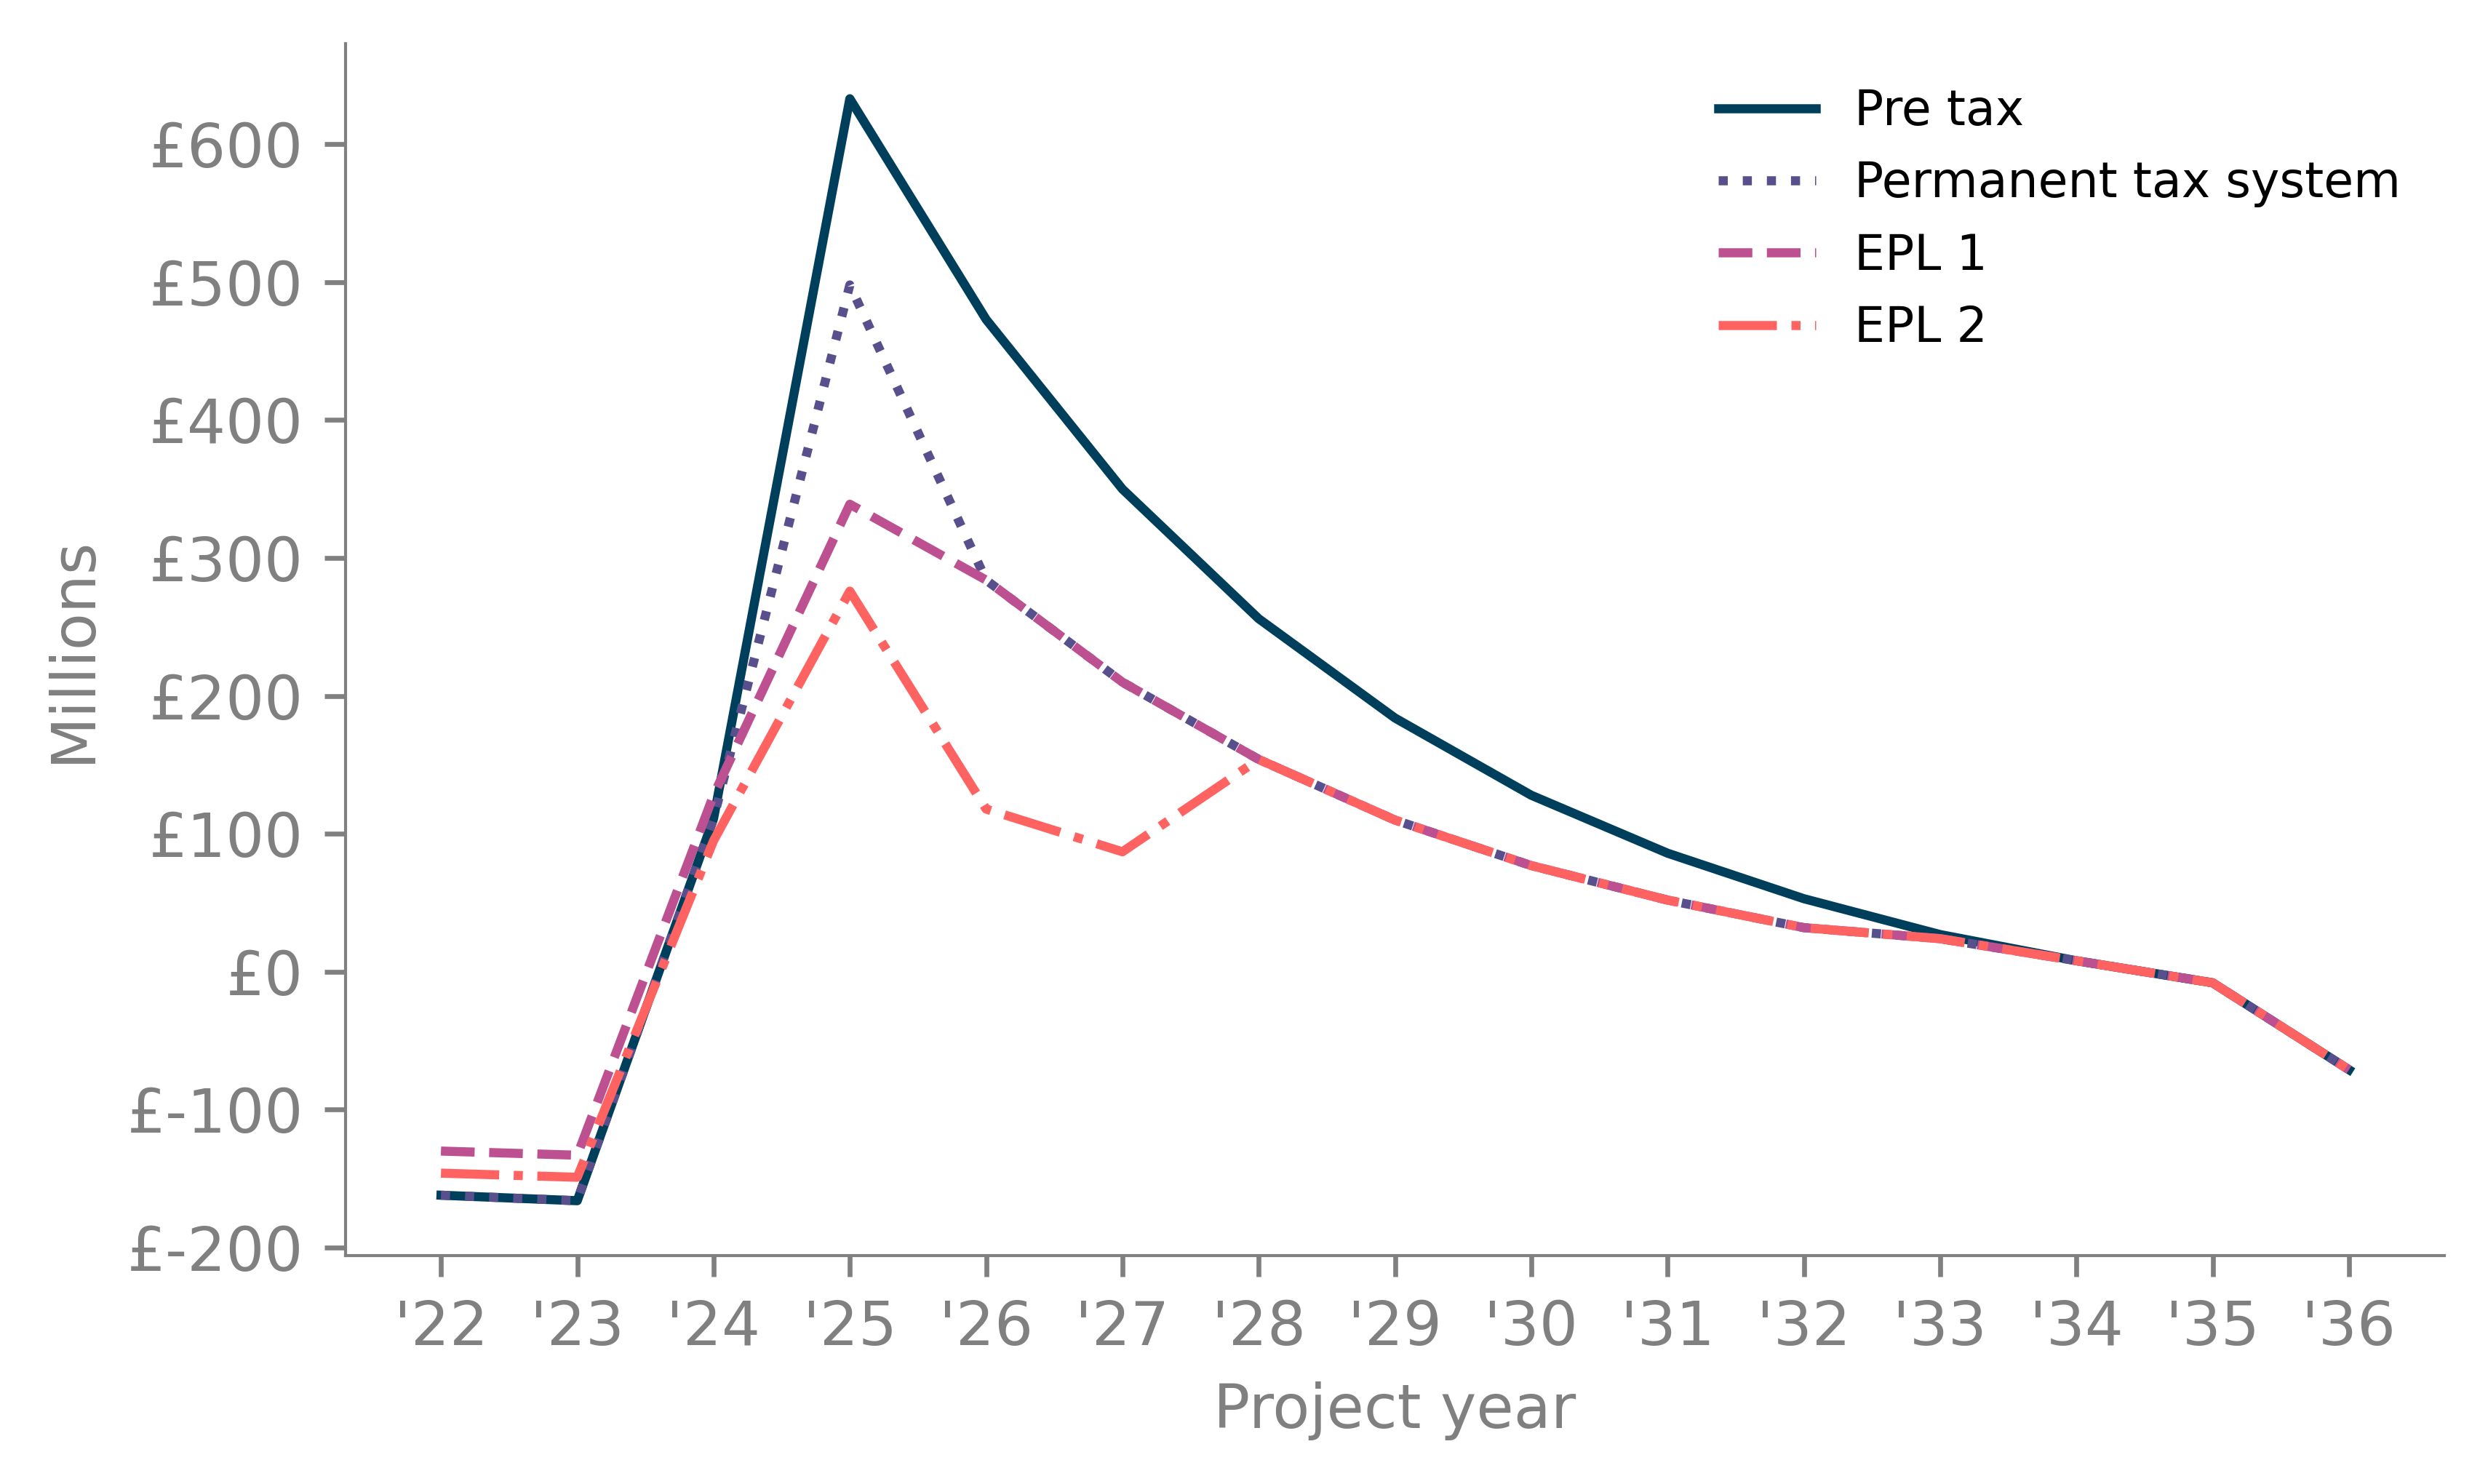

In [20]:
pre_tax = cashflow_medium_field['Pre tax'].ncf
tax1 = cashflow_medium_field['Post tax no EPL no other income'].post_tax_ncf
tax2 = cashflow_medium_field['Post tax EPL summer no other income'].post_tax_ncf
tax3 = cashflow_medium_field['Post tax EPL autumn no other income'].post_tax_ncf

index2022 = pd.RangeIndex(start = 2022, stop = 2022 + len(pre_tax))
pre_tax.index = index2022
pre_tax.index = pre_tax.index.map(str)
tax1.index = index2022
tax1.index = tax1.index.map(str)
tax2.index = index2022
tax2.index = tax2.index.map(str)
tax3.index = index2022
tax3.index = tax3.index.map(str)

fig, ax =plt.subplots(figsize=(5.8, 3.5), dpi=600, tight_layout=True)
ax.plot(pre_tax, label='Pre tax', c=color_base_line)
ax.plot(tax1, label="Permanent tax system", c=color_highlight_purple, ls=':')
ax.plot(tax2, label='EPL 1', c=color_highlight_red, ls='--')
ax.plot(tax3, label='EPL 2', c=color_highlight_orangered, ls='-.')

ax.set_xlabel("Project year")
ax.set_ylabel("Millions")

x_labels = [str("'" + year[2:4]) for year in pre_tax.index]
ax.set_xticks(ticks = pre_tax.index, labels = x_labels)

ax.yaxis.set_major_formatter('£{x:1.0f}')

ax.legend(frameon=False)
fig.savefig("./plots/medium_cashflows_full_noincome_comparison.png")

plt.show()

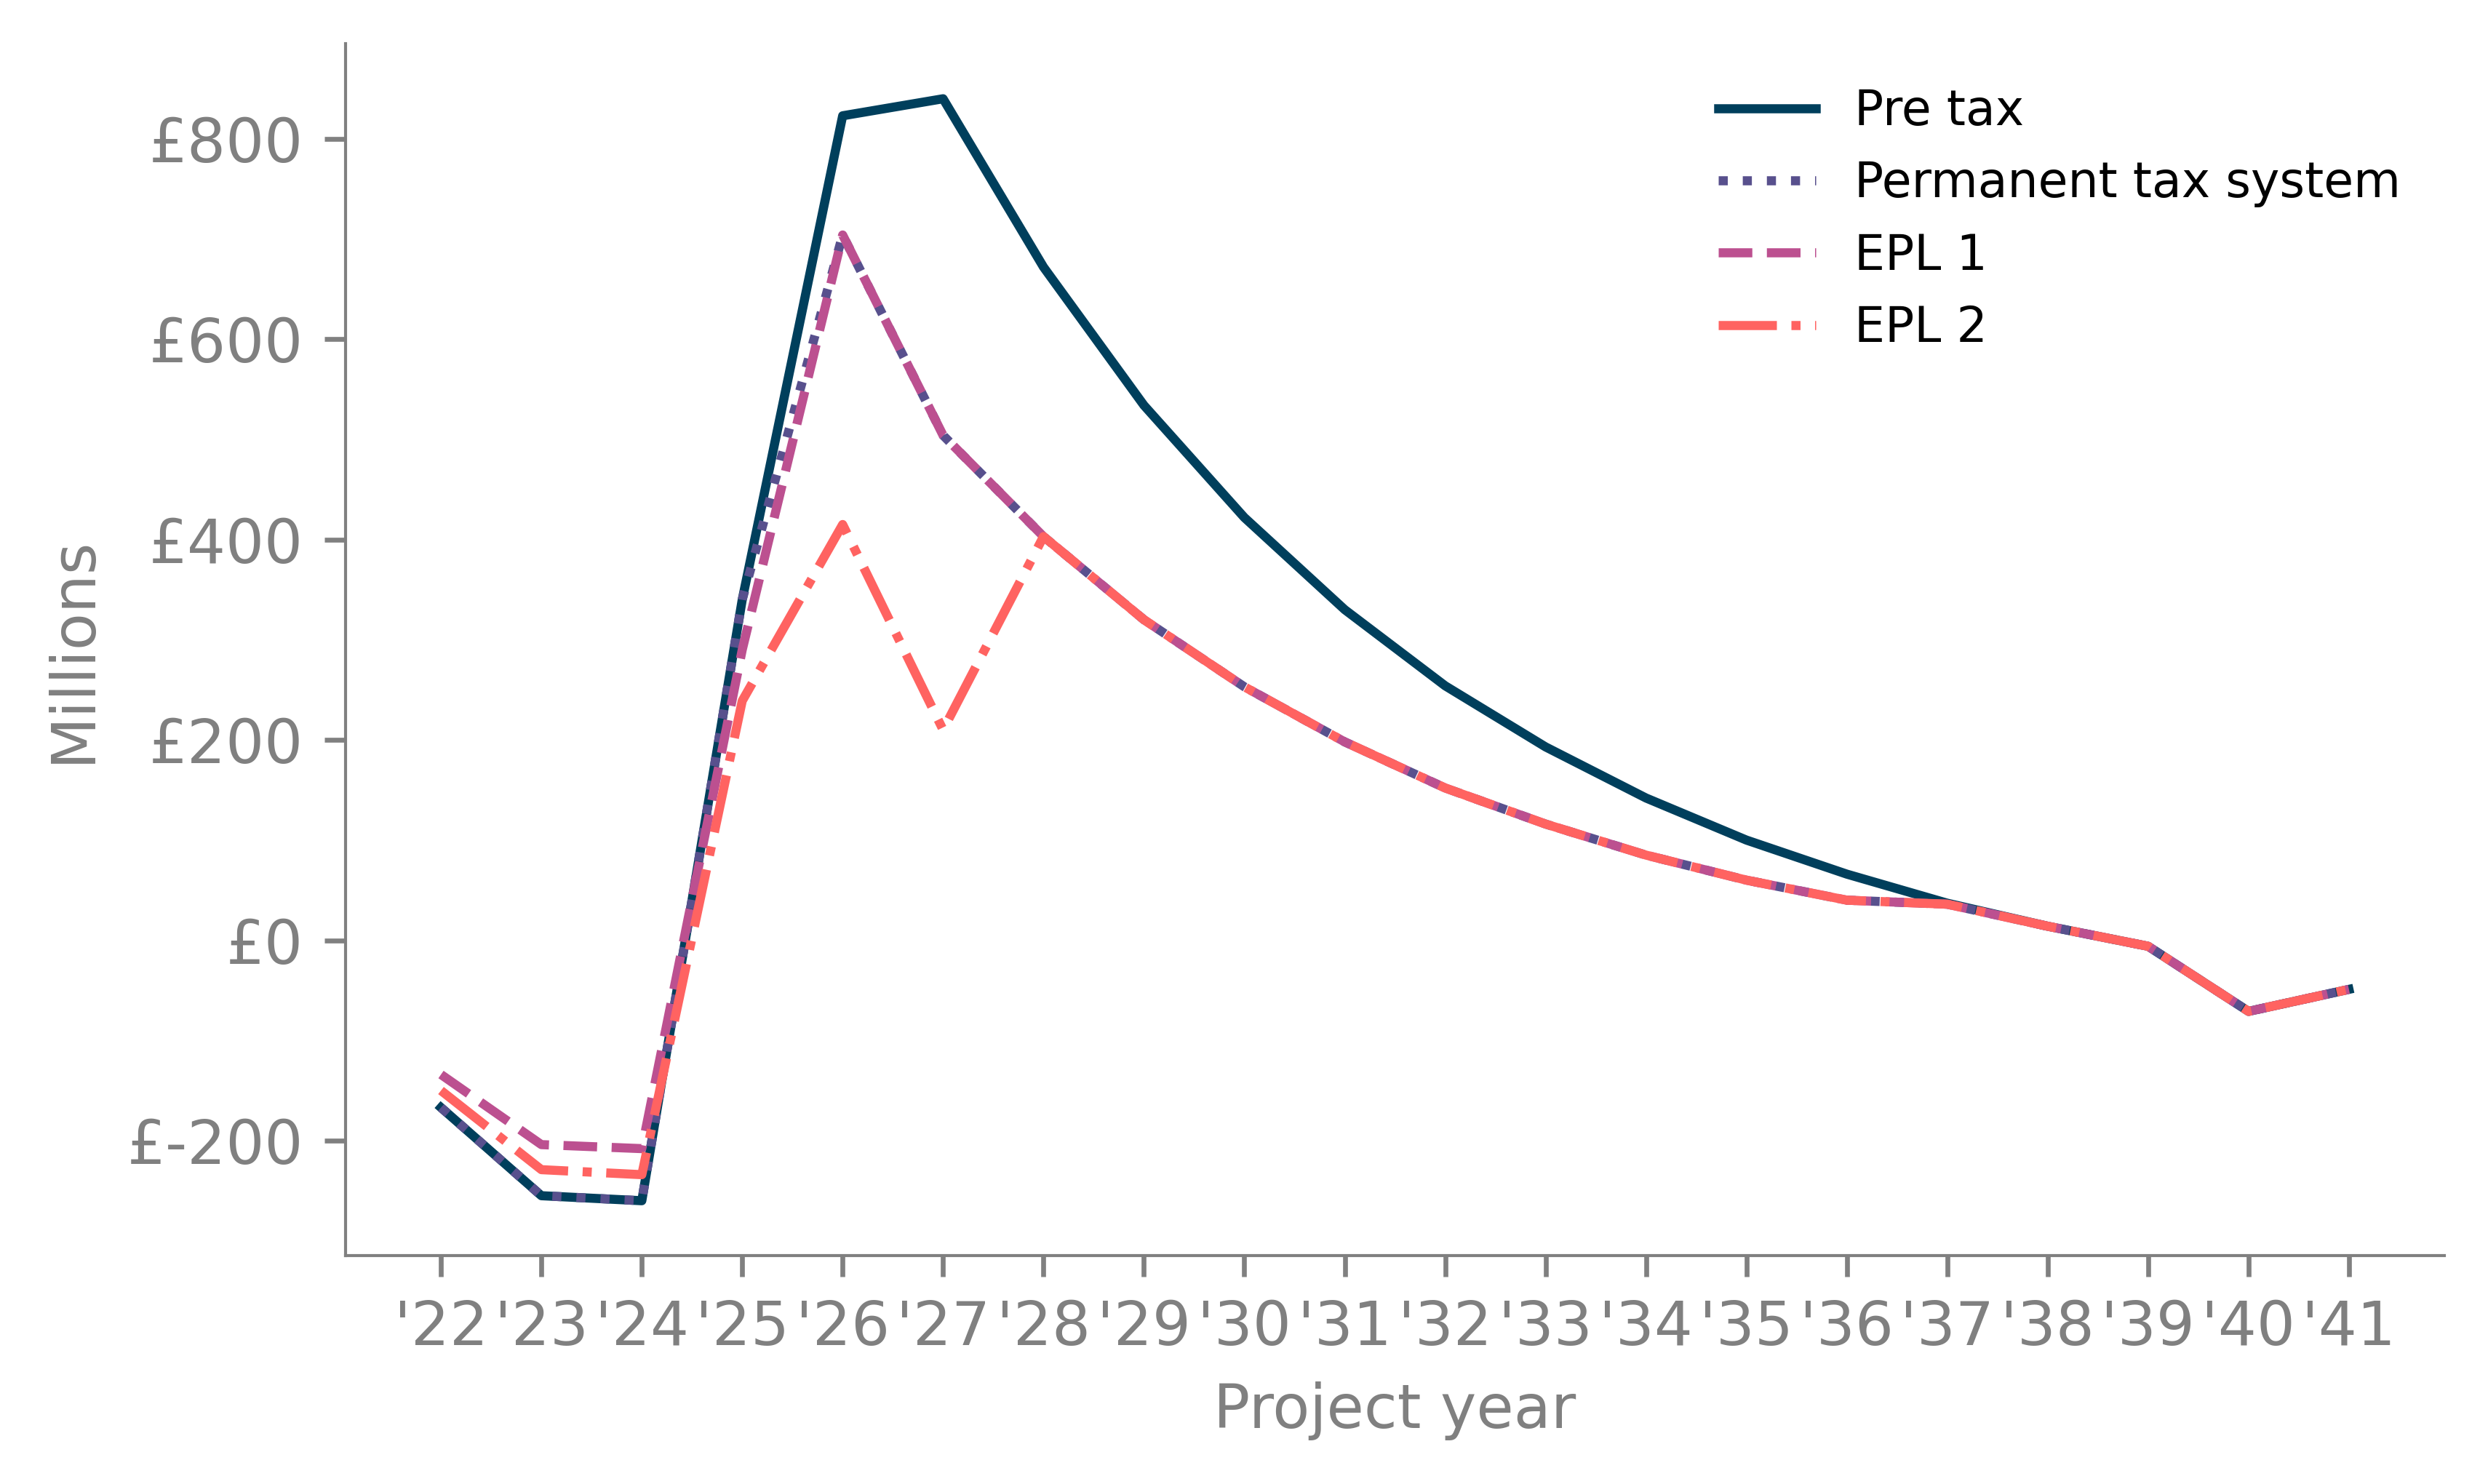

In [21]:
pre_tax = cashflow_large_field['Pre tax'].ncf
tax1 = cashflow_large_field['Post tax no EPL no other income'].post_tax_ncf
tax2 = cashflow_large_field['Post tax EPL summer no other income'].post_tax_ncf
tax3 = cashflow_large_field['Post tax EPL autumn no other income'].post_tax_ncf

index2022 = pd.RangeIndex(start = 2022, stop = 2022 + len(pre_tax))
pre_tax.index = index2022
pre_tax.index = pre_tax.index.map(str)
tax1.index = index2022
tax1.index = tax1.index.map(str)
tax2.index = index2022
tax2.index = tax2.index.map(str)
tax3.index = index2022
tax3.index = tax3.index.map(str)

fig, ax =plt.subplots(figsize=(5.8, 3.5), dpi=600, tight_layout=True)
ax.plot(pre_tax, label='Pre tax', c=color_base_line)
ax.plot(tax1, label="Permanent tax system", c=color_highlight_purple, ls=':')
ax.plot(tax2, label='EPL 1', c=color_highlight_red, ls='--')
ax.plot(tax3, label='EPL 2', c=color_highlight_orangered, ls='-.')

ax.set_xlabel("Project year")
ax.set_ylabel("Millions")

x_labels = [str("'" + year[2:4]) for year in pre_tax.index]
ax.set_xticks(ticks = pre_tax.index, labels = x_labels)

ax.yaxis.set_major_formatter('£{x:1.0f}')

ax.legend(frameon=False)
fig.savefig("./plots/large_cashflows_full_noincome_comparison.png")

plt.show()

# Tax results

In [22]:
results_small_field['tax_paid_results'].keys()

Index(['Post tax no EPL other income', 'Post tax EPL summer other income',
       'Post tax EPL autumn other income',
       'Post tax EPL summer 2019 start other income',
       'Post tax EPL autumn 2019 start other income',
       'Post tax no EPL no other income',
       'Post tax EPL summer no other income',
       'Post tax EPL autumn no other income',
       'Post tax EPL summer 2019 start no other income',
       'Post tax EPL autumn 2019 start no other income'],
      dtype='object')

In [23]:
# Tax paid table table for different categories


s_permanent = results_small_field['tax_paid_results']['Post tax no EPL other income']
s_permanent_no = results_small_field['tax_paid_results']['Post tax no EPL no other income']
s_summer = results_small_field['tax_paid_results']['Post tax EPL summer other income']
s_autumn = results_small_field['tax_paid_results']['Post tax EPL autumn other income']
s_summer_no = results_small_field['tax_paid_results']['Post tax EPL summer no other income']
s_autumn_no = results_small_field['tax_paid_results']['Post tax EPL autumn no other income']


m_permanent = results_medium_field['tax_paid_results']['Post tax no EPL other income']
m_permanent_no = results_medium_field['tax_paid_results']['Post tax no EPL no other income']
m_summer =results_medium_field['tax_paid_results']['Post tax EPL summer other income']
m_autumn = results_medium_field['tax_paid_results']['Post tax EPL autumn other income']
m_summer_no = results_medium_field['tax_paid_results']['Post tax EPL summer no other income']
m_autumn_no = results_medium_field['tax_paid_results']['Post tax EPL autumn no other income']

l_permanent = results_large_field['tax_paid_results']['Post tax no EPL other income']
l_permanent_no = results_large_field['tax_paid_results']['Post tax no EPL no other income']
l_summer =results_large_field['tax_paid_results']['Post tax EPL summer other income']
l_autumn = results_large_field['tax_paid_results']['Post tax EPL autumn other income']
l_summer_no = results_large_field['tax_paid_results']['Post tax EPL summer no other income']
l_autumn_no = results_large_field['tax_paid_results']['Post tax EPL autumn no other income']



data = np.array([[s_permanent, s_summer, s_autumn, s_permanent_no, s_summer_no, s_autumn_no],
                 [m_permanent, m_summer, m_autumn, m_permanent_no, m_summer_no, m_autumn_no],
                 [l_permanent, l_summer, l_autumn, l_permanent_no, l_summer_no, l_autumn_no]], np.int32)



arrays = [["Other income", 'Other income', 'Other income', "No income", 'No income', 'No income' ], ['Permanent', "EPL 1", "EPL 2", "Permanent", "EPL 1", "EPL 2"]]
columns = pd.MultiIndex.from_arrays(arrays, names=('Tax case', 'EPL case'))

table = pd.DataFrame(data, index = ["Field 1 - Small", "Field 2 - Medium", "Field 3 - Large"],
             columns = columns)
table.index.name = "Fields"
table

Tax case         Other income             No income            
EPL case            Permanent EPL 1 EPL 2 Permanent EPL 1 EPL 2
Fields                                                         
Field 1 - Small           120   175   224        68   124   172
Field 2 - Medium          515   649   876       418   552   780
Field 3 - Large           887   947  1318       691   751  1123

# NPV / I Ratios

In [24]:
results_small_field['npvi_ratios'].keys()

Index(['Post tax no EPL other income', 'Post tax EPL summer other income',
       'Post tax EPL autumn other income',
       'Post tax EPL summer 2019 start other income',
       'Post tax EPL autumn 2019 start other income',
       'Post tax no EPL no other income',
       'Post tax EPL summer no other income',
       'Post tax EPL autumn no other income',
       'Post tax EPL summer 2019 start no other income',
       'Post tax EPL autumn 2019 start no other income'],
      dtype='object')

In [25]:
# Tax paid table table for different categories
s_permanent = results_small_field['npvi_ratios']['Post tax no EPL other income']
s_permanent_no = results_small_field['npvi_ratios']['Post tax no EPL no other income']
s_summer = results_small_field['npvi_ratios']['Post tax EPL summer other income']
s_autumn = results_small_field['npvi_ratios']['Post tax EPL autumn other income']
s_summer_no = results_small_field['npvi_ratios']['Post tax EPL summer no other income']
s_autumn_no = results_small_field['npvi_ratios']['Post tax EPL autumn no other income']


m_permanent = results_medium_field['npvi_ratios']['Post tax no EPL other income']
m_permanent_no = results_medium_field['npvi_ratios']['Post tax no EPL no other income']
m_summer =results_medium_field['npvi_ratios']['Post tax EPL summer other income']
m_autumn = results_medium_field['npvi_ratios']['Post tax EPL autumn other income']
m_summer_no = results_medium_field['npvi_ratios']['Post tax EPL summer no other income']
m_autumn_no = results_medium_field['npvi_ratios']['Post tax EPL autumn no other income']

l_permanent = results_large_field['npvi_ratios']['Post tax no EPL other income']
l_permanent_no = results_large_field['npvi_ratios']['Post tax no EPL no other income']
l_summer =results_large_field['npvi_ratios']['Post tax EPL summer other income']
l_autumn = results_large_field['npvi_ratios']['Post tax EPL autumn other income']
l_summer_no = results_large_field['npvi_ratios']['Post tax EPL summer no other income']
l_autumn_no = results_large_field['npvi_ratios']['Post tax EPL autumn no other income']



data = np.array([[s_permanent, s_summer, s_autumn, s_permanent_no, s_summer_no, s_autumn_no],
                 [m_permanent, m_summer, m_autumn, m_permanent_no, m_summer_no, m_autumn_no],
                 [l_permanent, l_summer, l_autumn, l_permanent_no, l_summer_no, l_autumn_no]], np.float64)



arrays = [["Other income", 'Other income', 'Other income', "No income", 'No income', 'No income' ], ['Permanent', "EPL 1", "EPL 2", "Permanent", "EPL 1", "EPL 2"]]
columns = pd.MultiIndex.from_arrays(arrays, names=('Tax case', 'EPL case'))

table = pd.DataFrame(data, index = ["Field 1 - Small", "Field 2 - Medium", "Field 3 - Large"],
             columns = columns)
table.index.name = "Fields"
table

Tax case         Other income             No income            
EPL case            Permanent EPL 1 EPL 2 Permanent EPL 1 EPL 2
Fields                                                         
Field 1 - Small          0.69  0.78  0.46      0.62  0.45  0.03
Field 2 - Medium         1.45  1.63  1.17      1.24  1.17  0.60
Field 3 - Large          1.52  1.88  1.37      1.38  1.50  0.89

# Labour proposal for EPL Analysis

In [26]:
# Collate cashflows from base EPL and EPL2
# Examples with other income to show Prof. Kemp
small_permanent = cashflow_small_field['Post tax no EPL other income']['post_tax_ncf']
small_epl1 = cashflow_small_field['Post tax EPL summer other income']['post_tax_ncf']
small_epl2 = cashflow_small_field['Post tax EPL autumn other income']['post_tax_ncf']

medium_permanent = cashflow_medium_field['Post tax no EPL other income']['post_tax_ncf']
medium_epl1 = cashflow_medium_field['Post tax EPL summer other income']['post_tax_ncf']
medium_epl2 = cashflow_medium_field['Post tax EPL autumn other income']['post_tax_ncf']

large_permanent = cashflow_large_field['Post tax no EPL other income']['post_tax_ncf']
large_epl1 = cashflow_large_field['Post tax EPL summer other income']['post_tax_ncf']
large_epl2 = cashflow_large_field['Post tax EPL autumn other income']['post_tax_ncf']

In [27]:
# Collate NPV results
small_permanent_npv =results_small_field['npv_results']['Post tax no EPL other income']
small_epl1_npv =results_small_field['npv_results']['Post tax EPL summer other income']
small_epl2_npv = results_small_field['npv_results']['Post tax EPL autumn other income']

medium_permanent_npv =results_medium_field['npv_results']['Post tax no EPL other income']
medium_epl1_npv =results_medium_field['npv_results']['Post tax EPL summer other income']
medium_epl2_npv = results_medium_field['npv_results']['Post tax EPL autumn other income']

large_permanent_npv =results_large_field['npv_results']['Post tax no EPL other income']
large_epl1_npv =results_large_field['npv_results']['Post tax EPL summer other income']
large_epl2_npv = results_large_field['npv_results']['Post tax EPL autumn other income']


npv_first_epls_results_matrix = np.array([[small_permanent_npv, medium_permanent_npv, large_permanent_npv],
                 [small_epl1_npv, medium_epl1_npv, large_epl1_npv],
                 [small_epl2_npv, medium_epl2_npv, large_epl2_npv]], np.int32)
npv_first_epls_results_matrix

array([[ 105,  711, 1101],
       [ 117,  796, 1368],
       [  69,  570,  998]], dtype=int32)

In [28]:
# %% Get results for analysis and plotting

# Important assumptions that need to be set out in the paper.
# The original EPL began May 2022 and was to finish Dec 2025, the new EPL extends until March 2028
# For simplicty and because the model runs in years I assum orginal EPL lasts 4 years (2022-2025) assuming it
# includes all of 2022. For the new EPL it is 6 years, only two are added (2022-2027) this is to avid adjustments to first quarters of 2022
# and 2028; the net impact will not be meaningful as we are assume 5 more months in 2022 and 3 less of 2028.
# See EPL factsheet for more details
# https://www.gov.uk/government/publications/changes-to-the-energy-oil-and-gas-profits-levy/energy-oil-and-gas-profits-levy
# For the new labour proposal EPL the duration is of 8 years from 2022 as the prospal is to have it last all of 2029, effectively extending it two more years compared to the existing EPL. 
# To get results for different starting years, just need to with the amount of years the EPL is applicable. For example, if the start is 2025, then the EPL duration is only 3 years. 

# I am reusing the procedure above but I am only interested in the results for the tax assumptions of the labour
# here I am analysing EPL3a
field_assumptions = field_10m_assum
results_small_field = calculate_economic_results(field_assumptions=field_assumptions,
                                                 market_assumptions=market_assumptions,
                                                 tax_assumptions=tax_assumptions,
                                                 tax_assumptions_autumn_epl=tax_assumptions_labour_epl_a,
                                                 tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                 tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_50m_assum
results_medium_field = calculate_economic_results(field_assumptions=field_assumptions,
                                                  market_assumptions=market_assumptions,
                                                  tax_assumptions=tax_assumptions,
                                                  tax_assumptions_autumn_epl=tax_assumptions_labour_epl_a,
                                                  tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                  tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_100m_assum
results_large_field = calculate_economic_results(field_assumptions=field_assumptions,
                                                 market_assumptions=market_assumptions,
                                                 tax_assumptions=tax_assumptions,
                                                 tax_assumptions_autumn_epl=tax_assumptions_labour_epl_a,
                                                 tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                 tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_10m_assum
cashflow_small_field = calculate_cashflow_results(field_assumptions=field_assumptions,
                                                  market_assumptions=market_assumptions,
                                                  tax_assumptions=tax_assumptions,
                                                  tax_assumptions_autumn_epl=tax_assumptions_labour_epl_a,
                                                  tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                  tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_50m_assum
cashflow_medium_field = calculate_cashflow_results(field_assumptions=field_assumptions,
                                                   market_assumptions=market_assumptions,
                                                   tax_assumptions=tax_assumptions,
                                                   tax_assumptions_autumn_epl=tax_assumptions_labour_epl_a,
                                                   tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                   tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_100m_assum
cashflow_large_field = calculate_cashflow_results(field_assumptions=field_assumptions,
                                                  market_assumptions=market_assumptions,
                                                  tax_assumptions=tax_assumptions,
                                                  tax_assumptions_autumn_epl=tax_assumptions_labour_epl_a,
                                                  tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                  tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

small_epl3a = cashflow_small_field['Post tax EPL autumn other income']['post_tax_ncf']
medium_epl3a = cashflow_medium_field['Post tax EPL autumn other income']['post_tax_ncf']
large_epl3a = cashflow_large_field['Post tax EPL autumn other income']['post_tax_ncf']

small_epl3a_npv =results_small_field['npv_results']['Post tax EPL autumn other income']
medium_epl3a_npv =results_medium_field['npv_results']['Post tax EPL autumn other income']
large_epl3a_npv = results_large_field['npv_results']['Post tax EPL autumn other income']

In [29]:
# For EPL3b from labour I created a new different Economic analysis class so there is no savings from EPL, neither IA nor Devex allowance

from labour_epl3b_economic_analysis_class import calculate_economic_results as epl3b_calculate_economic_results
from labour_epl3b_economic_analysis_class import calculate_cashflow_results as epl3b_calculate_cashflow_results

field_assumptions = field_10m_assum
results_small_field = epl3b_calculate_economic_results(field_assumptions=field_assumptions,
                                                 market_assumptions=market_assumptions,
                                                 tax_assumptions=tax_assumptions,
                                                 tax_assumptions_autumn_epl=tax_assumptions_labour_epl_b,
                                                 tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                 tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_50m_assum
results_medium_field = epl3b_calculate_economic_results(field_assumptions=field_assumptions,
                                                  market_assumptions=market_assumptions,
                                                  tax_assumptions=tax_assumptions,
                                                  tax_assumptions_autumn_epl=tax_assumptions_labour_epl_b,
                                                  tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                  tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_100m_assum
results_large_field = epl3b_calculate_economic_results(field_assumptions=field_assumptions,
                                                 market_assumptions=market_assumptions,
                                                 tax_assumptions=tax_assumptions,
                                                 tax_assumptions_autumn_epl=tax_assumptions_labour_epl_b,
                                                 tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                 tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_10m_assum
cashflow_small_field = epl3b_calculate_cashflow_results(field_assumptions=field_assumptions,
                                                  market_assumptions=market_assumptions,
                                                  tax_assumptions=tax_assumptions,
                                                  tax_assumptions_autumn_epl=tax_assumptions_labour_epl_b,
                                                  tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                  tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_50m_assum
cashflow_medium_field = epl3b_calculate_cashflow_results(field_assumptions=field_assumptions,
                                                   market_assumptions=market_assumptions,
                                                   tax_assumptions=tax_assumptions,
                                                   tax_assumptions_autumn_epl=tax_assumptions_labour_epl_b,
                                                   tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                   tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_100m_assum
cashflow_large_field = epl3b_calculate_cashflow_results(field_assumptions=field_assumptions,
                                                  market_assumptions=market_assumptions,
                                                  tax_assumptions=tax_assumptions,
                                                  tax_assumptions_autumn_epl=tax_assumptions_labour_epl_b,
                                                  tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                  tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

small_epl3b = cashflow_small_field['Post tax EPL autumn other income']['post_tax_ncf']
medium_epl3b = cashflow_medium_field['Post tax EPL autumn other income']['post_tax_ncf']
large_epl3b = cashflow_large_field['Post tax EPL autumn other income']['post_tax_ncf']

small_epl3b_npv =results_small_field['npv_results']['Post tax EPL autumn other income']
medium_epl3b_npv =results_medium_field['npv_results']['Post tax EPL autumn other income']
large_epl3b_npv = results_large_field['npv_results']['Post tax EPL autumn other income']

In [30]:
# Collect all results, plot and table
labour_epls_npv_matrix = np.array([[small_epl3a_npv, medium_epl3a_npv, large_epl3a_npv],
                                   [small_epl3b_npv, medium_epl3b_npv, large_epl3b_npv]], np.int32)

labour_epls_npvs = np.vstack((npv_first_epls_results_matrix, labour_epls_npv_matrix))
table = pd.DataFrame(labour_epls_npvs, index = ["Permanent system", "EPL 1", "EPL 2", "EPL 3a", "EPL 3b"],
                     columns = ["Small field", "Medium field", "Large field"])
table.index.name = "Tax regime"
table

,Small field,Medium field,Large field
Tax regime,,,
Permanent system,105,711,1101
EPL 1,117,796,1368
EPL 2,69,570,998
EPL 3a,41,424,690
EPL 3b,-16,239,414


Text(0.5, 1.0, 'Small field real post-tax cashflow by tax regime (base year=2022)')

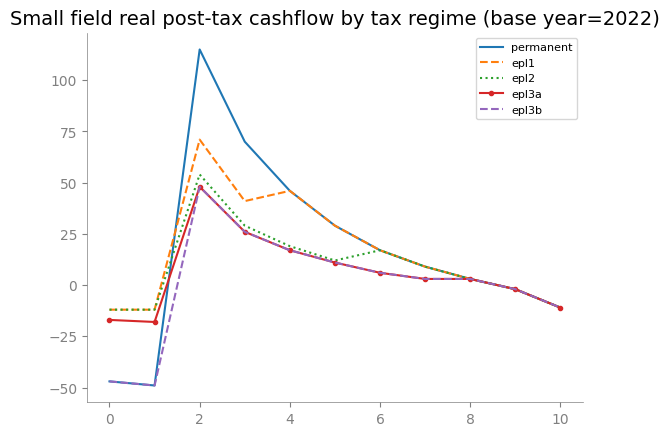

In [31]:
small_all_cases_cashflow = pd.DataFrame({"permanent":small_permanent.values,
                                        "epl1":small_epl1.values,
                                        "epl2":small_epl2.values,
                                        "epl3a":small_epl3a.values,
                                        "epl3b":small_epl3b.values})

small_all_cases_cashflow.plot(style=['-','--', ':', '.-', "--"])
plt.title("Small field real post-tax cashflow by tax regime (base year=2022)")

In [32]:
small_all_cases_cashflow

,permanent,epl1,epl2,epl3a,epl3b
0,-47.0,-12.0,-12.0,-17.0,-47.0
1,-49.0,-12.0,-12.0,-18.0,-49.0
2,115.0,71.0,54.0,48.0,48.0
3,70.0,41.0,29.0,26.0,26.0
4,46.0,46.0,19.0,17.0,17.0
5,29.0,29.0,12.0,11.0,11.0
6,17.0,17.0,17.0,6.0,6.0
7,9.0,9.0,9.0,3.0,3.0
8,3.0,3.0,3.0,3.0,3.0
9,-2.0,-2.0,-2.0,-2.0,-2.0


Text(0.5, 1.0, 'Medium field real post-tax cashflow by tax regime (base year=2022)')

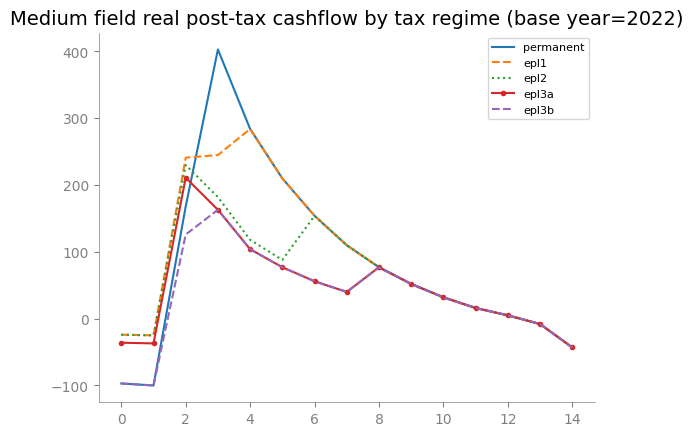

In [33]:
# Medium
medium_all_cases_cashflow = pd.DataFrame({"permanent":medium_permanent.values,
                                        "epl1":medium_epl1.values,
                                        "epl2":medium_epl2.values,
                                        "epl3a":medium_epl3a.values,
                                        "epl3b":medium_epl3b.values})

medium_all_cases_cashflow.plot(style=['-','--', ':', '.-', "--"])
plt.title("Medium field real post-tax cashflow by tax regime (base year=2022)")

In [34]:
medium_all_cases_cashflow

,permanent,epl1,epl2,epl3a,epl3b
0,-97.0,-24.0,-24.0,-36.0,-97.0
1,-100.0,-25.0,-25.0,-37.0,-100.0
2,168.0,241.0,230.0,211.0,126.0
3,403.0,245.0,182.0,163.0,163.0
4,284.0,284.0,118.0,104.0,104.0
5,210.0,210.0,88.0,77.0,77.0
6,154.0,154.0,154.0,56.0,56.0
7,110.0,110.0,110.0,40.0,40.0
8,77.0,77.0,77.0,77.0,77.0
9,52.0,52.0,52.0,52.0,52.0


Text(0.5, 1.0, 'Large field real post-tax cashflow by tax regime (base year=2022)')

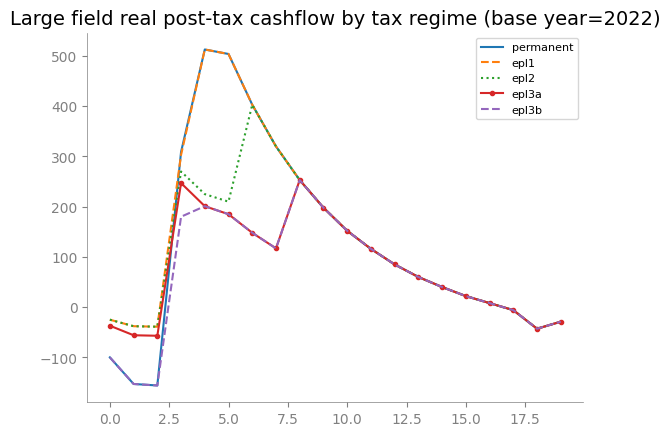

In [35]:
# Large
large_all_cases_cashflow = pd.DataFrame({"permanent":large_permanent.values,
                                        "epl1":large_epl1.values,
                                        "epl2":large_epl2.values,
                                        "epl3a":large_epl3a.values,
                                        "epl3b":large_epl3b.values})

large_all_cases_cashflow.plot(style=['-','--', ':', '.-', "--"])
plt.title("Large field real post-tax cashflow by tax regime (base year=2022)")

In [36]:
large_all_cases_cashflow

,permanent,epl1,epl2,epl3a,epl3b
0,-100.0,-25.0,-25.0,-37.0,-100.0
1,-153.0,-38.0,-38.0,-56.0,-153.0
2,-156.0,-39.0,-39.0,-57.0,-156.0
3,309.0,303.0,270.0,247.0,180.0
4,513.0,513.0,225.0,201.0,201.0
5,504.0,504.0,210.0,185.0,185.0
6,403.0,403.0,403.0,148.0,148.0
7,320.0,320.0,320.0,117.0,117.0
8,253.0,253.0,253.0,253.0,253.0
9,198.0,198.0,198.0,198.0,198.0
